# 신입세션 2주차 과제 코드
15기 이서은

# 서울시 따릉이 자전거 대여량 예측 

#### 변수설명
Target
* Rented Bike Count : 해당 날짜,시각별 자전거 대여 횟수

Feature
* Date : 날짜
* Hour : 시각
* Temperature(℃) : 기온
* Humidity(%) : 습도
* Wind speed (m/s) : 풍속
* Visibility(10m) : 가시성
* Dew point temperature(℃) : 이슬점 온도
* Solar Radiation(MJ/m2) : 태양복사량
* Rainfall(mm) : 강수량
* Snowfall(cm) : 적설량
* Seasons : 계절
* Holiday : 공휴일 여부
* Functioning Day : 운영일 여부

## 라이브러리 설치 및 환경 설정 <a class="tocSkip">

In [135]:
#기본 라이브러리 설치
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'  #plot내 글씨를 선명하게 해주는 옵션
import missingno as msno
import seaborn.objects as so

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

In [136]:
#working directory 확인
os.getcwd() #현재 작업 위치 출력

'c:\\Users\\hemoa\\OneDrive\\바탕 화면\\비어플\\신입세션\\code'

# 데이터 불러오기

In [137]:
data = pd.read_csv('../data/train.csv', encoding='cp949')
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,24/10/2018,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0,NaN,No Holiday,Yes
1,01/05/2018,1536,14,23.0,64,2.8,520,15.8,1.59,0.0,0.0,Spring,Holiday,Yes
2,14/11/2018,327,2,6.2,59,0.6,1584,-1.2,0.00,0.0,0.0,Autumn,No Holiday,Yes
3,31/08/2018,170,4,23.2,83,1.6,1102,20.1,0.00,0.0,0.0,Summer,No Holiday,Yes
4,26/06/2018,45,5,23.7,64,0.9,876,16.4,0.00,0.1,0.0,Summer,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,08/02/2018,255,7,-9.6,67,1.0,1503,-14.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7004,28/03/2018,104,4,10.6,77,0.9,422,6.7,0.00,0.0,0.0,Spring,No Holiday,Yes
7005,30/04/2018,569,0,14.7,54,1.3,718,5.4,0.00,0.0,0.0,Spring,No Holiday,Yes
7006,29/05/2018,2234,8,20.5,66,1.7,1062,13.9,0.34,0.0,0.0,Spring,No Holiday,Yes


In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       7008 non-null   object 
 1   Rented Bike Count          7008 non-null   int64  
 2   Hour                       7008 non-null   int64  
 3   Temperature(°C)            6306 non-null   float64
 4   Humidity(%)                7008 non-null   int64  
 5   Wind speed (m/s)           6303 non-null   float64
 6   Visibility (10m)           7008 non-null   int64  
 7   Dew point temperature(°C)  7008 non-null   float64
 8   Solar Radiation (MJ/m2)    7008 non-null   float64
 9   Rainfall(mm)               7008 non-null   float64
 10  Snowfall (cm)              7008 non-null   float64
 11  Seasons                    6309 non-null   object 
 12  Holiday                    7008 non-null   object 
 13  Functioning Day            7008 non-null   objec

복잡한 columns명 변경

In [139]:
# 'Date', 'Rented Bike Count', 'Hour', 'Temp', 'Humid', 'WindSpeed', 'Visibility', 'DewPTemp', 'SolarRad', 'Rainfall', 'Snowfall', 'Season', 'Holiday', 'Functioning Day'
data.columns = ['Date', 'Rented Bike Count', 'Hour', 'Temp', 'Humid', 'WindSpeed', 'Visibility', 'DewPTemp', 'SolarRad', 'Rainfall', 'Snowfall', 'Season', 'Holiday', 'Functioning Day']

In [140]:
data.head(5)

,Date,Rented Bike Count,Hour,Temp,Humid,WindSpeed,Visibility,DewPTemp,SolarRad,Rainfall,Snowfall,Season,Holiday,Functioning Day
0,24/10/2018,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0,NaN,No Holiday,Yes
1,01/05/2018,1536,14,23.0,64,2.8,520,15.8,1.59,0.0,0.0,Spring,Holiday,Yes
2,14/11/2018,327,2,6.2,59,0.6,1584,-1.2,0.00,0.0,0.0,Autumn,No Holiday,Yes
3,31/08/2018,170,4,23.2,83,1.6,1102,20.1,0.00,0.0,0.0,Summer,No Holiday,Yes
4,26/06/2018,45,5,23.7,64,0.9,876,16.4,0.00,0.1,0.0,Summer,No Holiday,Yes


In [141]:
data.tail(5)

,Date,Rented Bike Count,Hour,Temp,Humid,WindSpeed,Visibility,DewPTemp,SolarRad,Rainfall,Snowfall,Season,Holiday,Functioning Day
7003,08/02/2018,255,7,-9.6,67,1.0,1503,-14.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7004,28/03/2018,104,4,10.6,77,0.9,422,6.7,0.00,0.0,0.0,Spring,No Holiday,Yes
7005,30/04/2018,569,0,14.7,54,1.3,718,5.4,0.00,0.0,0.0,Spring,No Holiday,Yes
7006,29/05/2018,2234,8,20.5,66,1.7,1062,13.9,0.34,0.0,0.0,Spring,No Holiday,Yes
7007,20/09/2018,1290,17,19.3,76,2.1,2000,14.9,0.21,0.0,0.0,NaN,No Holiday,Yes


In [142]:
data.describe() #기술통계량 확인

,Rented Bike Count,Hour,Temp,Humid,WindSpeed,Visibility,DewPTemp,SolarRad,Rainfall,Snowfall
count,7008.000000,7008.000000,6306.000000,7008.000000,6303.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000
mean,708.597603,11.559646,13.030082,58.141981,1.732937,1440.761558,4.042066,0.574576,0.150271,0.075300
std,647.980391,6.923619,11.986773,20.423404,1.030763,607.545441,13.121249,0.874529,1.134598,0.440936
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,6.000000,3.600000,42.000000,1.000000,946.000000,-4.800000,0.000000,0.000000,0.000000
50%,505.500000,12.000000,14.000000,57.000000,1.500000,1703.000000,5.100000,0.010000,0.000000,0.000000
75%,1071.000000,18.000000,22.675000,74.000000,2.350000,2000.000000,14.900000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# 1차 전처리
Target  
- Rented Bike Count (int)

Feature  
 범주형(category)  
 - Date : datetime 형식으로 변환
 - Hour : 시간, 0~23 (int)
 - Season : 계절 -> 범주형
 - Holiday, Functioning Day -> 범주형


 수치형(numeric)
 - 날씨 변수 : Temp, Humid, WindSpeed, Visibility, DewPTemp, SolarRad, Rainfall, Snowfall

## datetime 형식으로 변환

In [143]:
# 날짜 형식을 datetime 형식으로 변환
data['Date']=pd.to_datetime(data['Date'], dayfirst=True)
# 년, 월, 일 열로 분리
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

## 결측치 및 중복 데이터 확인
- WindSpeed : 705
- Temp : 702
- Season : 699 결측치를 가짐.
- 중복 데이터는 없음.

## 결측치 확인

<Axes: >

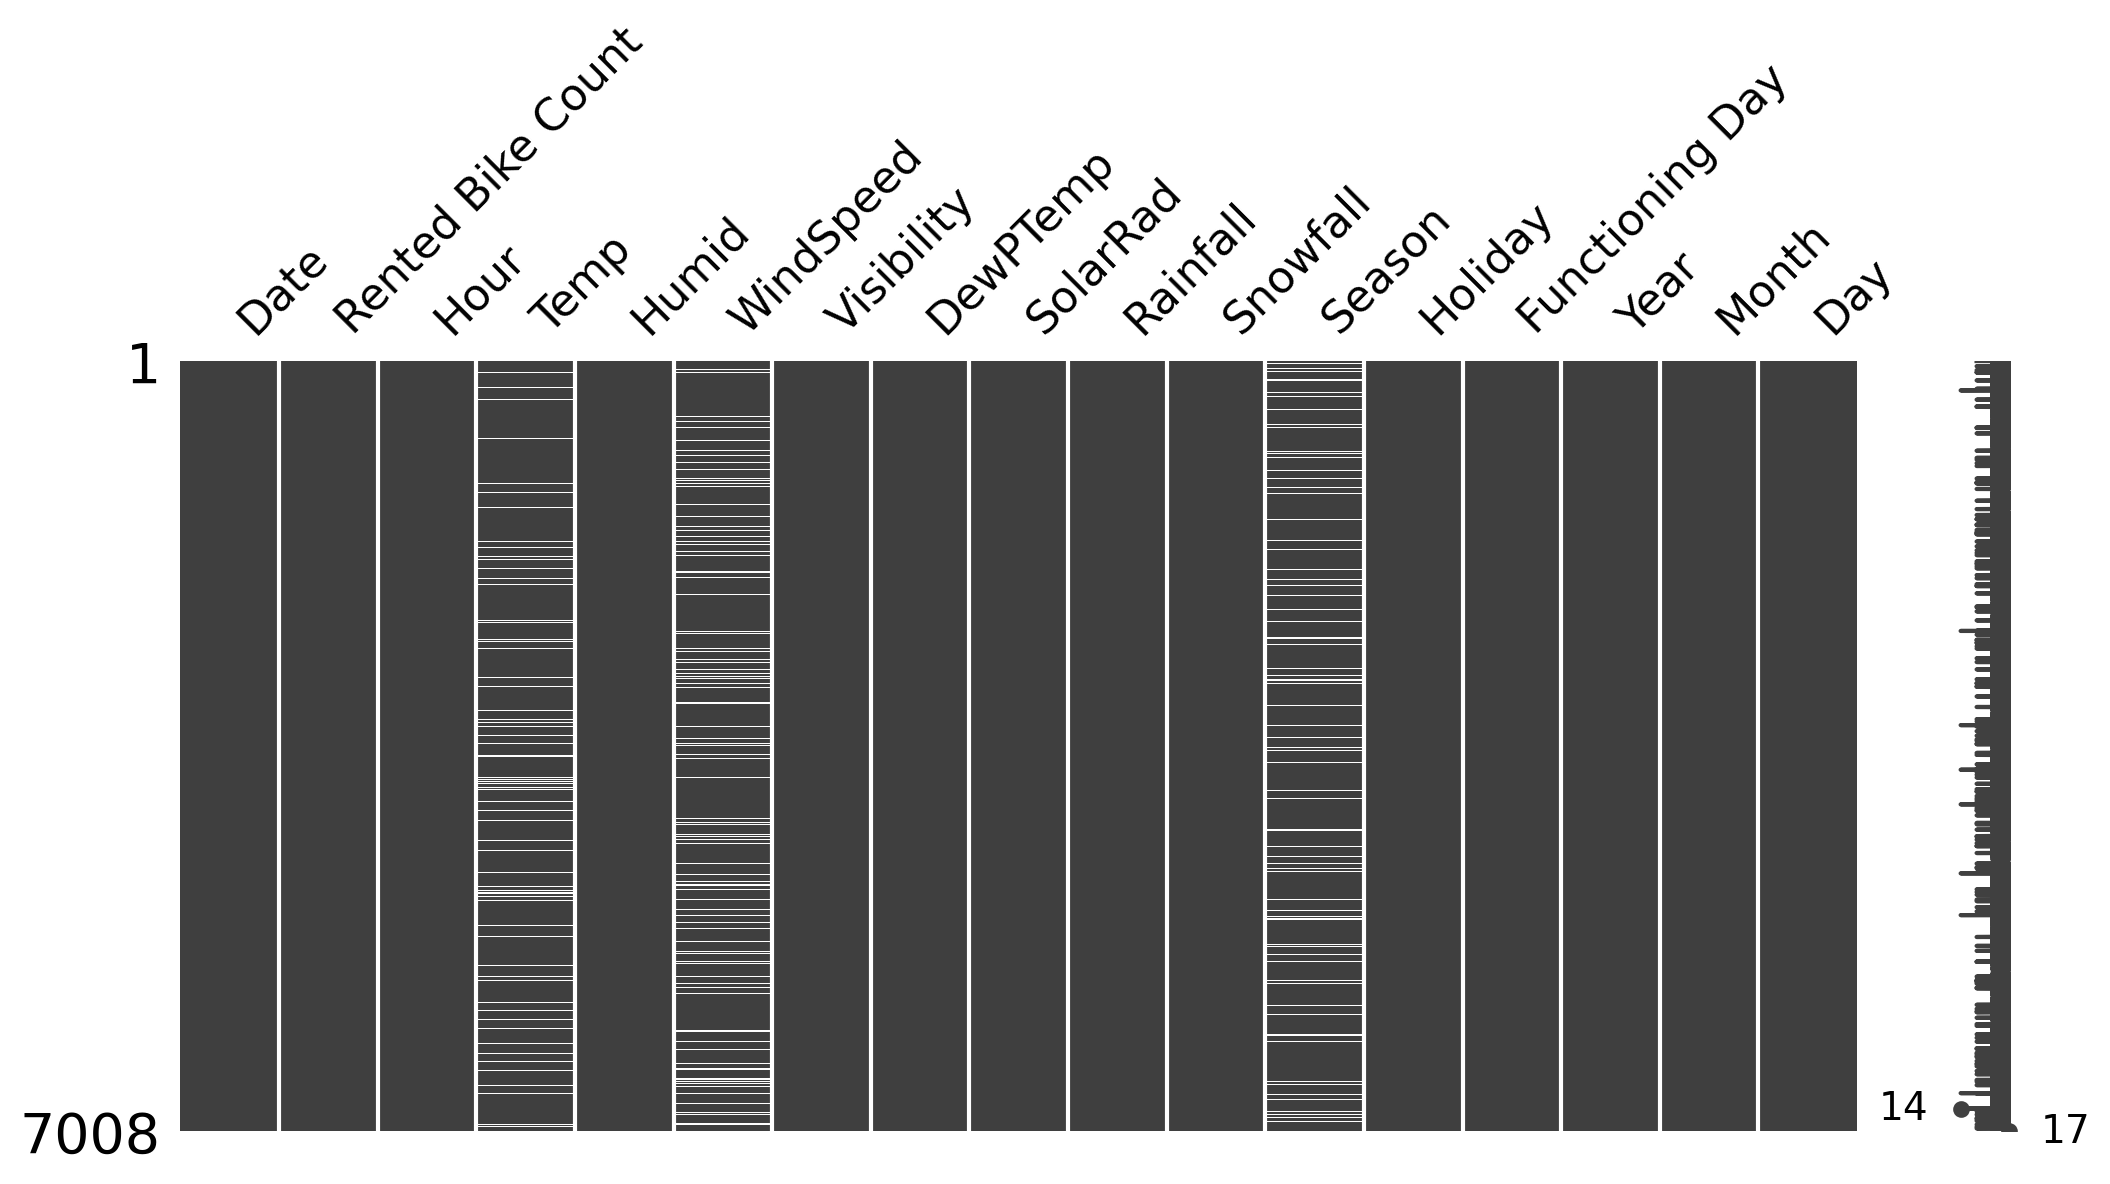

In [144]:
msno.matrix(data, figsize=(12,5))

In [145]:
data.isna().sum(axis=0).sort_values(ascending=False) #결측치 개수 내림차순 정렬

WindSpeed            705
Temp                 702
Season               699
Date                   0
Snowfall               0
Month                  0
Year                   0
Functioning Day        0
Holiday                0
SolarRad               0
Rainfall               0
Rented Bike Count      0
DewPTemp               0
Visibility             0
Humid                  0
Hour                   0
Day                    0
dtype: int64

Windspeed, Temp, Season에서 결측치가 있음을 확인할 수 있다.

## 중복항 확인하기

In [146]:
# 중복항 확인하기
data.duplicated().sum()

0

중복항 없음을 확인할 수 있다.

## 결측값 처리하기

### Season 결측치 채우기
Spring: 3, 4, 5  
Summer: 6, 7, 8  
Autumn: 9, 10, 11  
Winter: 12, 1, 2

In [147]:
df1 = data.copy()
df1['Season'].isna().sum()

699

In [148]:
df1['Season'].value_counts()

Season
Summer    1598
Autumn    1587
Winter    1570
Spring    1554
Name: count, dtype: int64

In [149]:
print(f"Spring: {data[data['Season']=='Spring']['Month'].unique()}")
print(f"Summer: {data[data['Season']=='Summer']['Month'].unique()}")
print(f"Autumn: {data[data['Season']=='Autumn']['Month'].unique()}")
print(f"Winter: {data[data['Season']=='Winter']['Month'].unique()}")

Spring: [5 3 4]
Summer: [8 6 7]
Autumn: [11  9 10]
Winter: [ 2  1 12]


Spring: 3, 4, 5  
Summer: 6, 7, 8  
Autumn: 9, 10, 11  
Winter: 12, 1, 2  
각 월에 해당하는 계절을 알 수 있다. 이를 기반으로 계절 결측치를 채울 것이다.

In [150]:
# Nan값에 계절 넣기
def fill_season(row):
    if pd.isna(row['Season']):
        if row['Month'] in [3, 4, 5]:
            return 'Spring'
        elif row['Month'] in [6, 7, 8]:
            return 'Summer'
        elif row['Month'] in [9, 10, 11]:
            return 'Autumn'
        elif row['Month'] in [12, 1, 2]:
            return 'Winter'
    else:
        return row['Season']
df1['Season'] = df1.apply(fill_season, axis=1)

In [151]:
# 계절 결측치가 제대로 대체되었는지 확인하기
df1[df1['Season'].isna()]

,Date,Rented Bike Count,Hour,Temp,Humid,WindSpeed,Visibility,DewPTemp,SolarRad,Rainfall,Snowfall,Season,Holiday,Functioning Day,Year,Month,Day


In [152]:
print(f"결측치를 채우기 전: {data['Season'].value_counts()}")
print('*'* 50)
print(f"결측치를 채우기 후: {df1['Season'].value_counts()}")

결측치를 채우기 전: Season
Summer    1598
Autumn    1587
Winter    1570
Spring    1554
Name: count, dtype: int64
**************************************************
결측치를 채우기 후: Season
Summer    1771
Autumn    1760
Winter    1750
Spring    1727
Name: count, dtype: int64


### Windspeed 결측치 채우기
- 시계열 데이터이므로 스플라인 보간법을 이용

In [153]:
df2=df1.groupby(['Date', 'Month', 'Hour'])['WindSpeed'].first().reset_index()
df2

,Date,Month,Hour,WindSpeed
0,2017-12-01,12,0,2.2
1,2017-12-01,12,1,0.8
2,2017-12-01,12,2,1.0
3,2017-12-01,12,3,0.9
4,2017-12-01,12,4,NaN
...,...,...,...,...
7003,2018-11-30,11,17,2.1
7004,2018-11-30,11,18,1.9
7005,2018-11-30,11,19,2.6
7006,2018-11-30,11,21,0.3


In [154]:
df2[df2[['Date', 'Month', 'Hour']].duplicated()] #중복행 확인

,Date,Month,Hour,WindSpeed


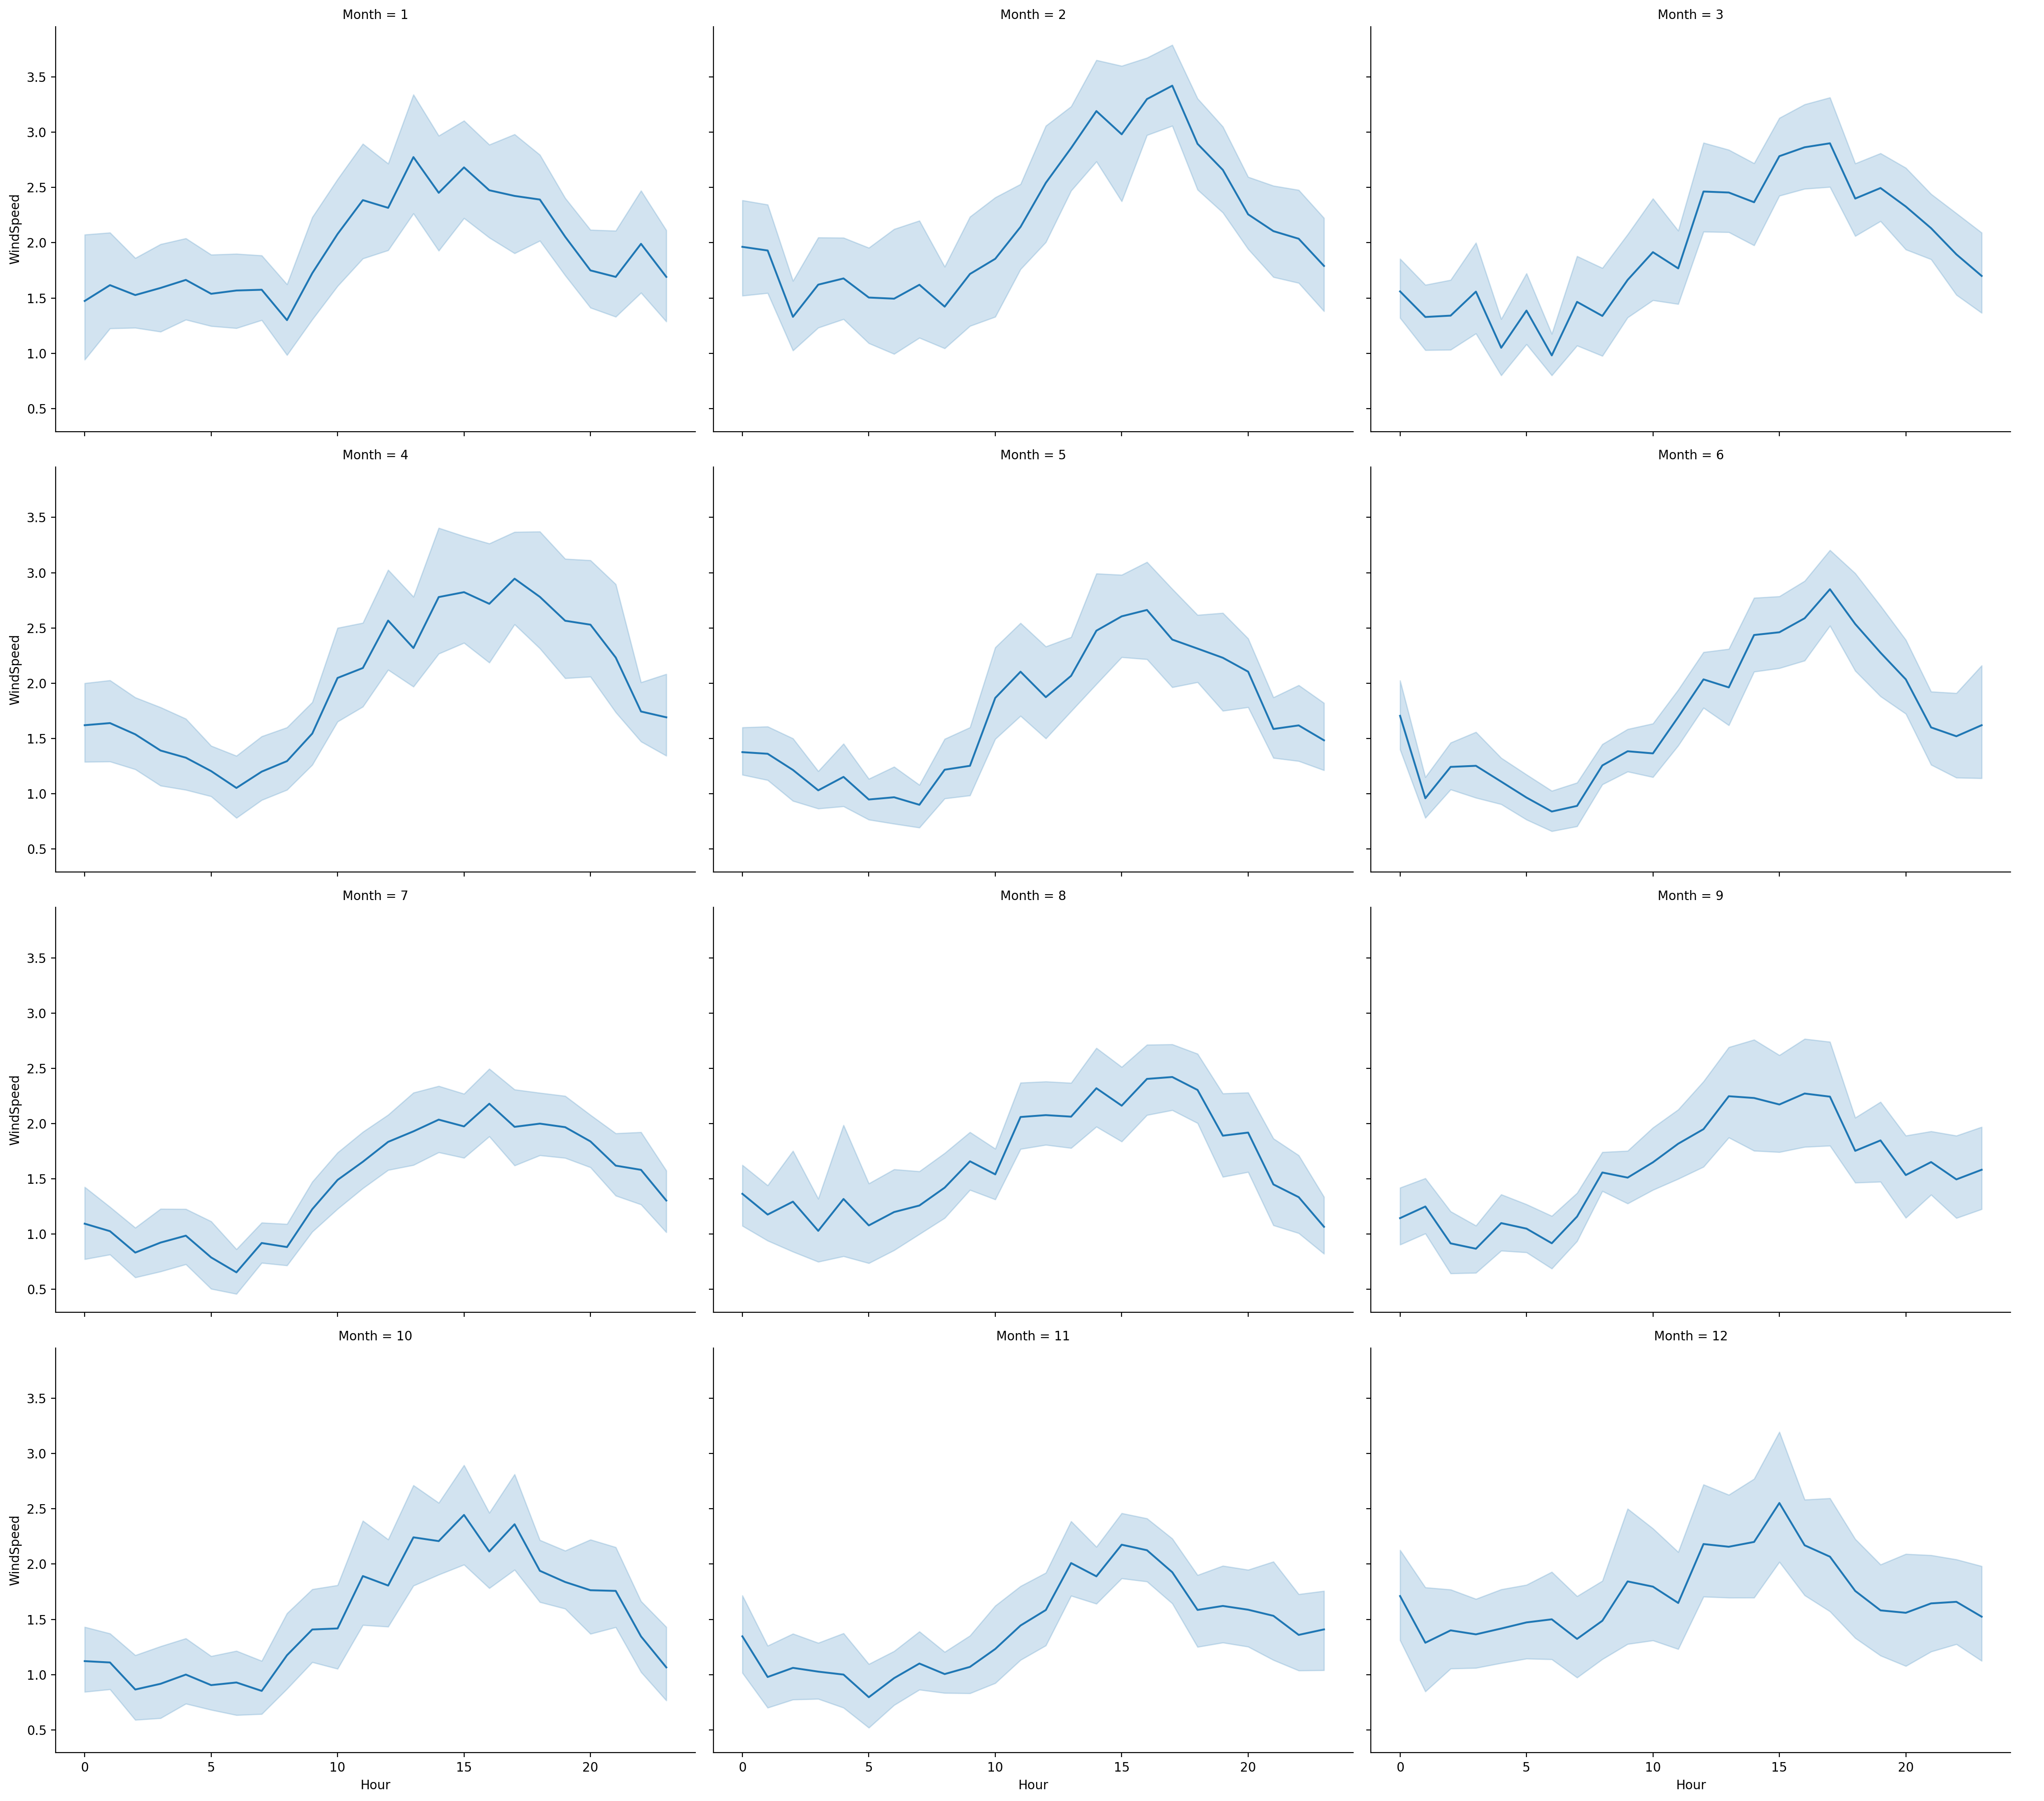

In [155]:
df2_Na = df2.dropna()
# Month, Hour별 대여 풍속 확인하기
g = sns.FacetGrid(df2_Na, col="Month", col_wrap=3, height=5, aspect=1.5)
g.map(sns.lineplot, "Hour", "WindSpeed")
g.set_axis_labels("Hour", "WindSpeed")
g.add_legend()

풍속은 다양한 기상 조건, 지형, 기온, 그리고 기타 요인에 의해 복잡하게 변동한다. 따라서 비선형적인 변화를 보임.  
스플라인 보간법은 이러한 비선형적 변화를 정밀하게 모델링하고 부드럽고 연속적인 곡선을 생성할 수 있는 방법이다. 따라서 풍속은 스플라인 보간법을 사용하겠다.

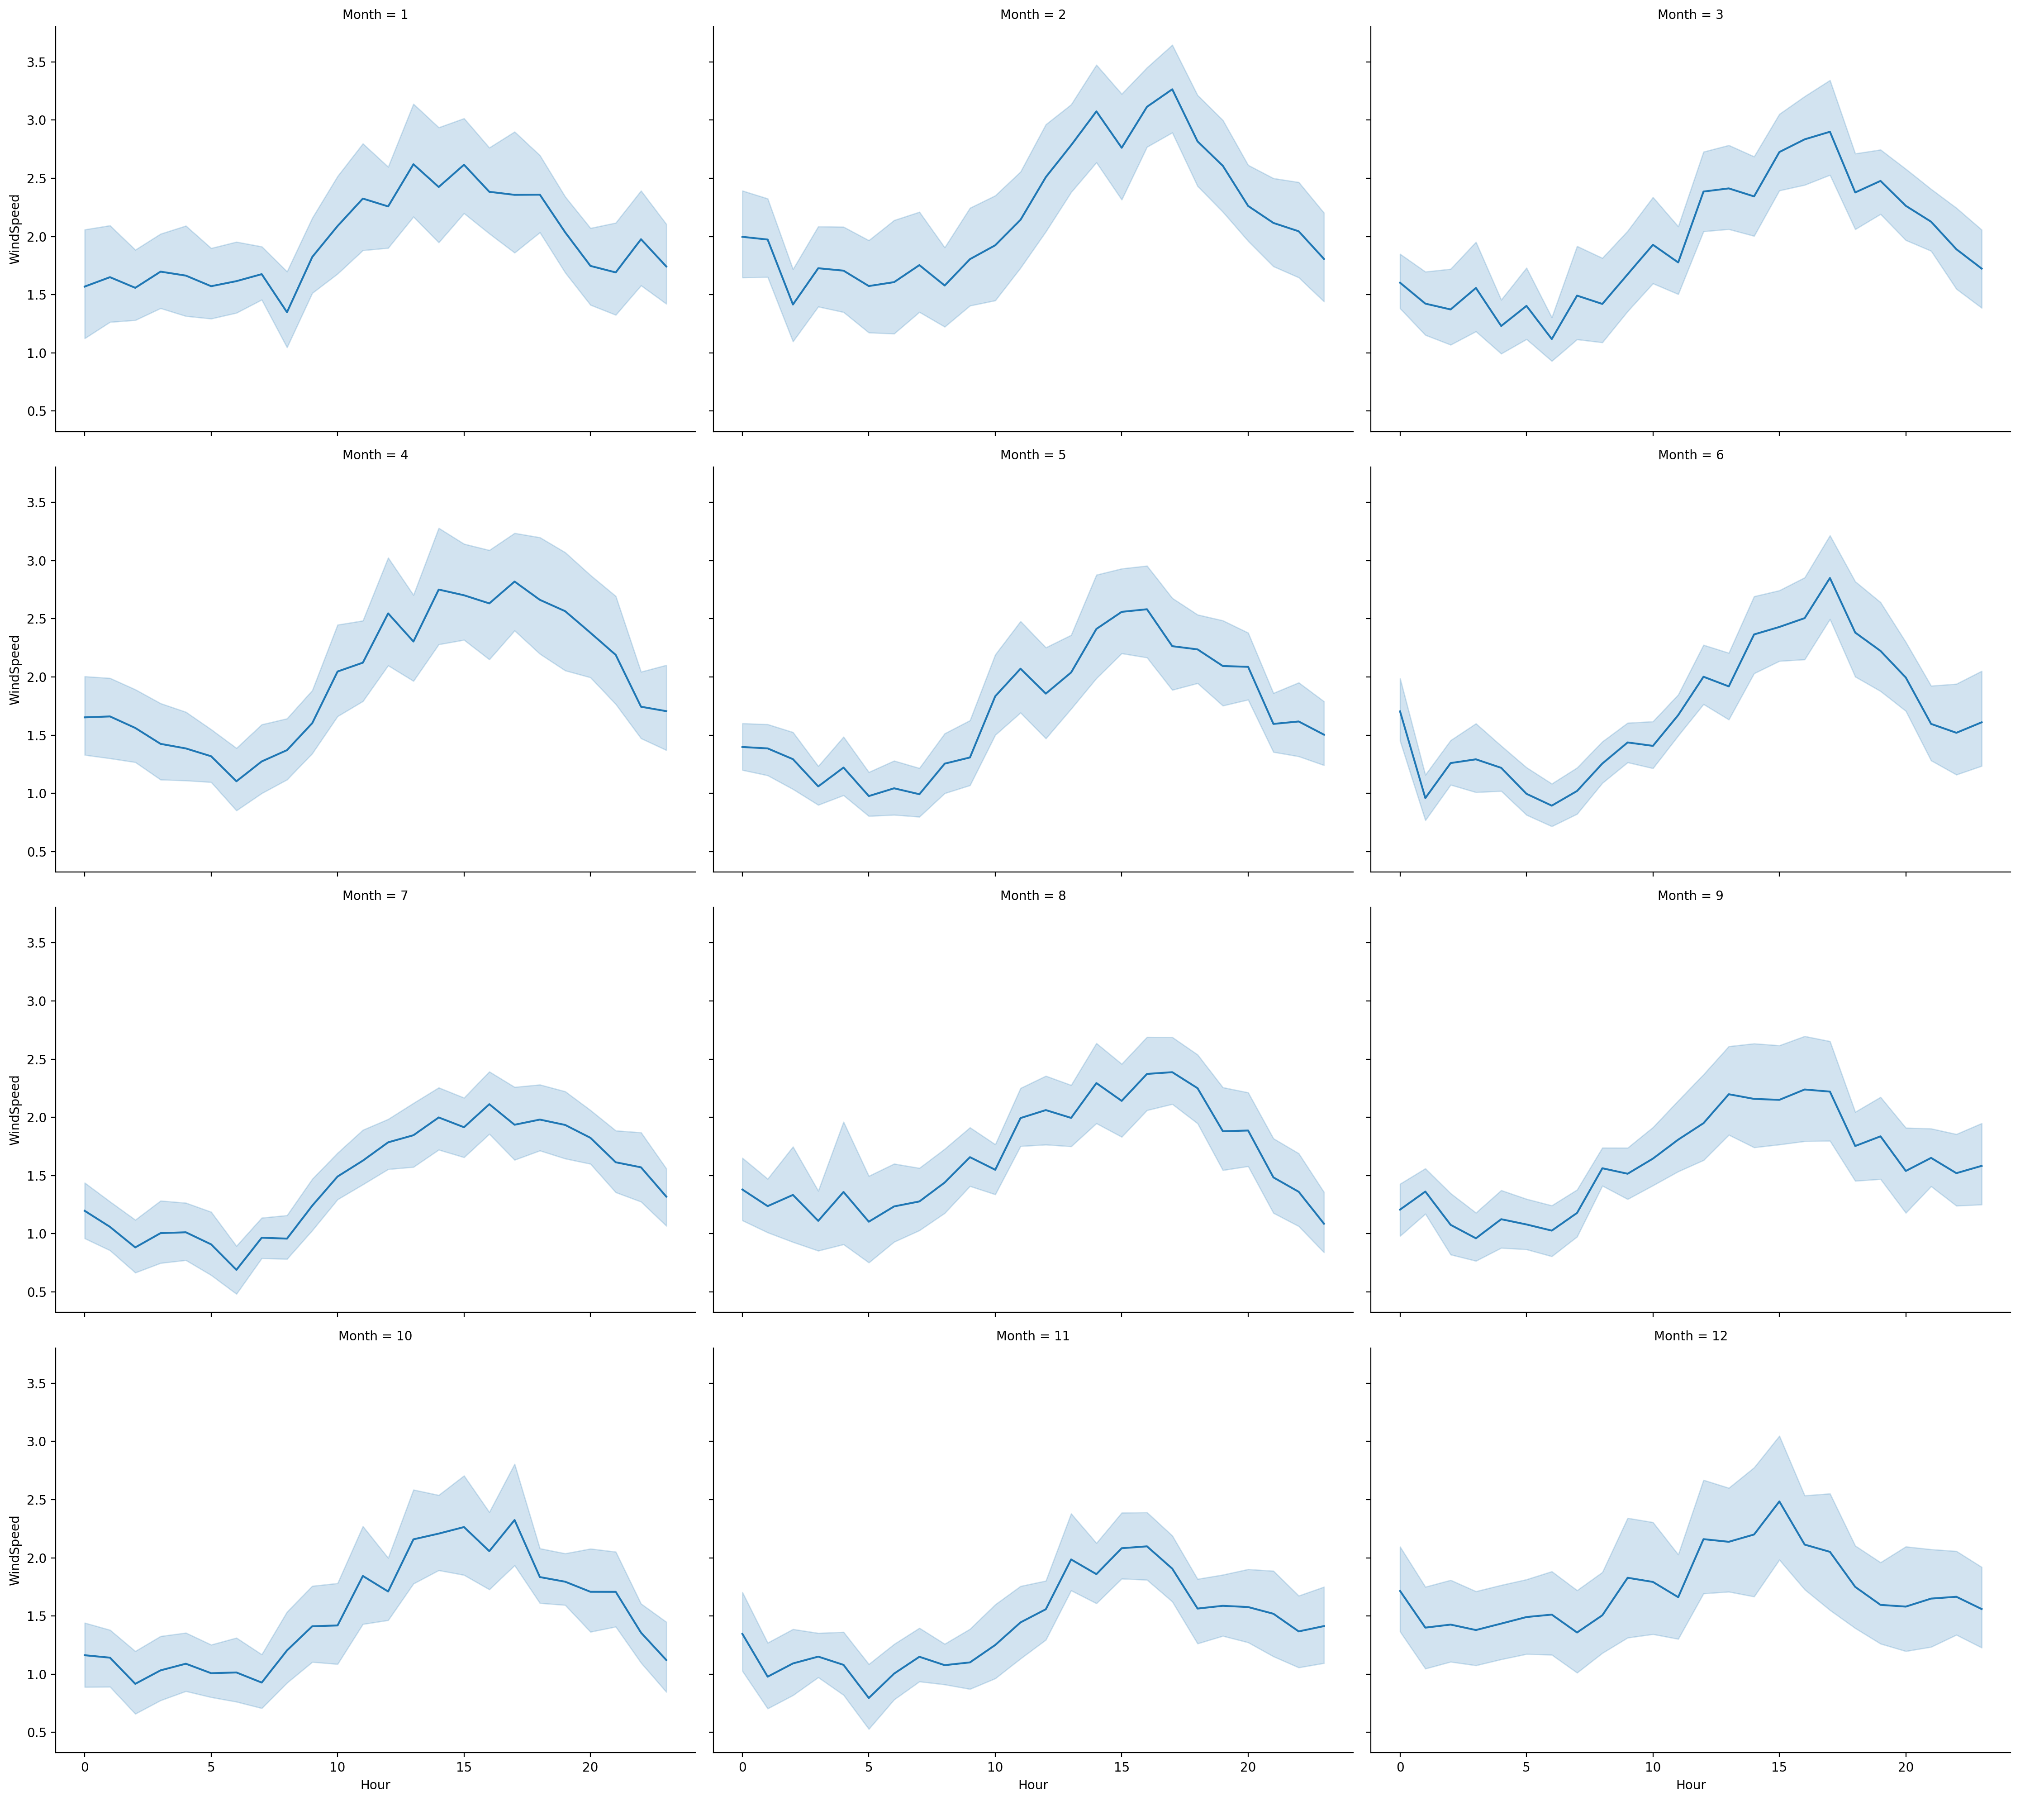

In [156]:
# 스플라인 보간법, 3차 다항식 이용
df2['WindSpeed'] = df2['WindSpeed'].interpolate(method='spline', order=3)

g = sns.FacetGrid(df2, col="Month", col_wrap=3, height=5, aspect=1.5)
g.map(sns.lineplot, "Hour", "WindSpeed")
g.set_axis_labels("Hour", "WindSpeed")
g.add_legend()

In [157]:
df2['WindSpeed'].isna().sum()

0

In [158]:
# df6을 df4_2에 병합하기
df3 = df1.copy()
# data과 df3를 'Date'와 'Hour' 열을 기준으로 병합
df3 = df1.merge(df2[['Date', 'Hour', 'WindSpeed']], on=['Date', 'Hour'], how='left', suffixes=('', '_df2'))

# 병합 후 'Temp' 열 업데이트
df3['WindSpeed'] = df3['WindSpeed_df2']
df3.drop(columns=['WindSpeed_df2'], inplace=True)
df3

,Date,Rented Bike Count,Hour,Temp,Humid,WindSpeed,Visibility,DewPTemp,SolarRad,Rainfall,Snowfall,Season,Holiday,Functioning Day,Year,Month,Day
0,2018-10-24,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0,Autumn,No Holiday,Yes,2018,10,24
1,2018-05-01,1536,14,23.0,64,2.8,520,15.8,1.59,0.0,0.0,Spring,Holiday,Yes,2018,5,1
2,2018-11-14,327,2,6.2,59,0.6,1584,-1.2,0.00,0.0,0.0,Autumn,No Holiday,Yes,2018,11,14
3,2018-08-31,170,4,23.2,83,1.6,1102,20.1,0.00,0.0,0.0,Summer,No Holiday,Yes,2018,8,31
4,2018-06-26,45,5,23.7,64,0.9,876,16.4,0.00,0.1,0.0,Summer,No Holiday,Yes,2018,6,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,2018-02-08,255,7,-9.6,67,1.0,1503,-14.5,0.00,0.0,0.0,Winter,No Holiday,Yes,2018,2,8
7004,2018-03-28,104,4,10.6,77,0.9,422,6.7,0.00,0.0,0.0,Spring,No Holiday,Yes,2018,3,28
7005,2018-04-30,569,0,14.7,54,1.3,718,5.4,0.00,0.0,0.0,Spring,No Holiday,Yes,2018,4,30
7006,2018-05-29,2234,8,20.5,66,1.7,1062,13.9,0.34,0.0,0.0,Spring,No Holiday,Yes,2018,5,29


### Temperature 결측치 채우기

#### 온도와 관련된 상관계수 찾기

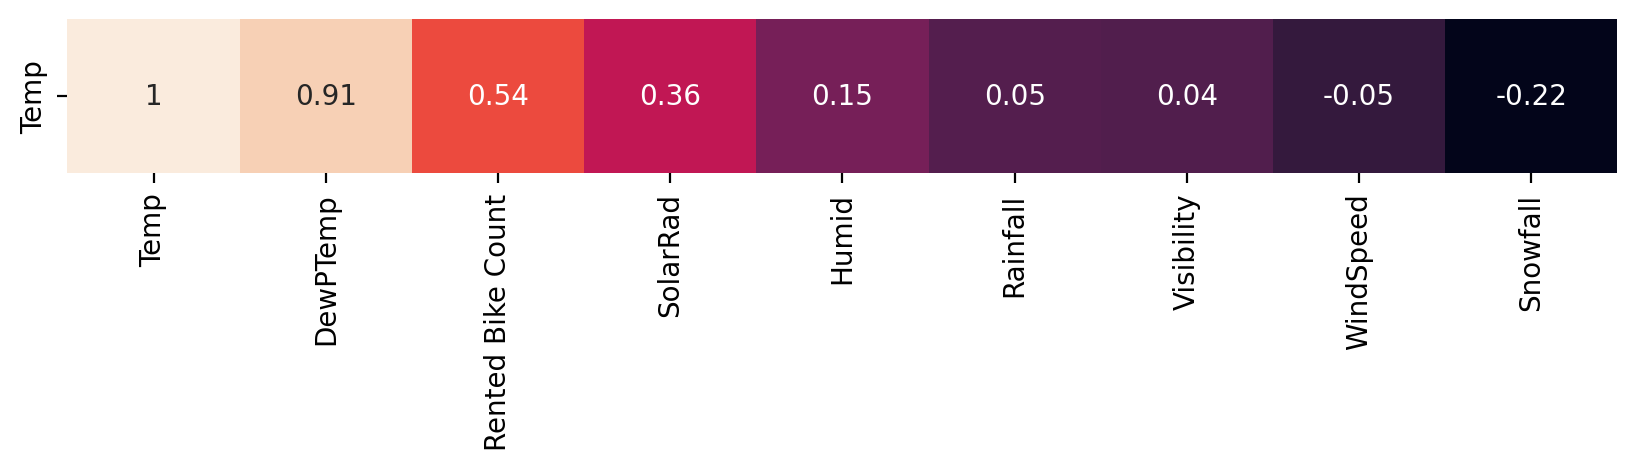

In [159]:
df3_Temp = df3.drop(['Date', 'Hour','Season','Holiday','Functioning Day', 'Year', 'Month', 'Day'], axis=1)
plt.figure(figsize=(10,1))
sns.heatmap(df3_Temp.corr()['Temp'].sort_values(ascending=False).round(2).to_frame().T, annot=True, cbar=False)
plt.show()

온도와 이슬점은 0.91로 매우 강한 양의 상관관계를 갖는다. 이에 이슬점과 온도를 이용한 공식으로 결측치를 대체하면 높은 정확률을 볼 수 있을 것이라고 기대한다.

이슬점 온도 산출 공식
- 근삿값 공식 : 이슬점온도 = 온도 - (100-습도%)/5  

이 식에 습도가 들어가기때문에 습도에 대한 변수 탐색부터 진행하고 결측치 대체를 진행하겠다.

#### Humidity 탐색

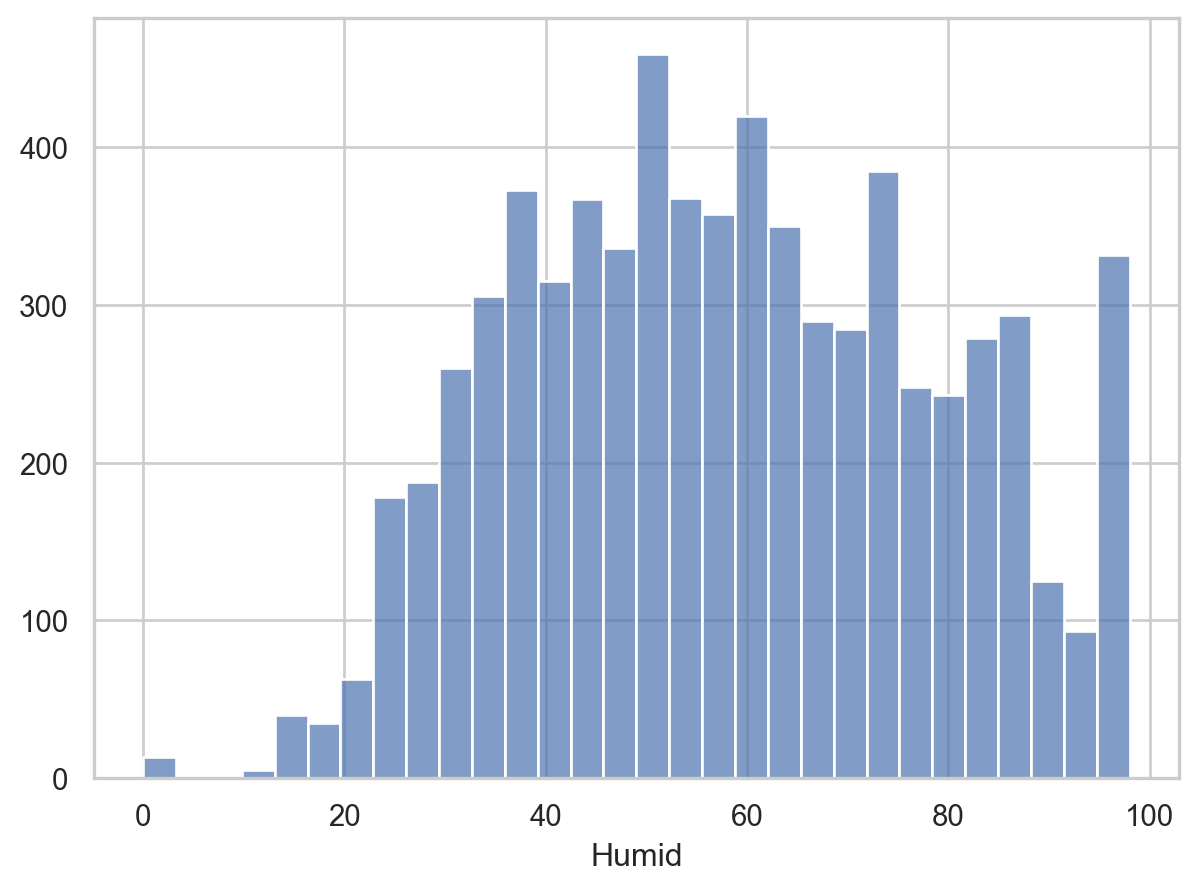

In [160]:
(
    so.Plot(df3['Humid'])
    .add(so.Bars(), so.Hist())
    .theme({**sns.axes_style("whitegrid")})
)

<Axes: xlabel='Temp'>

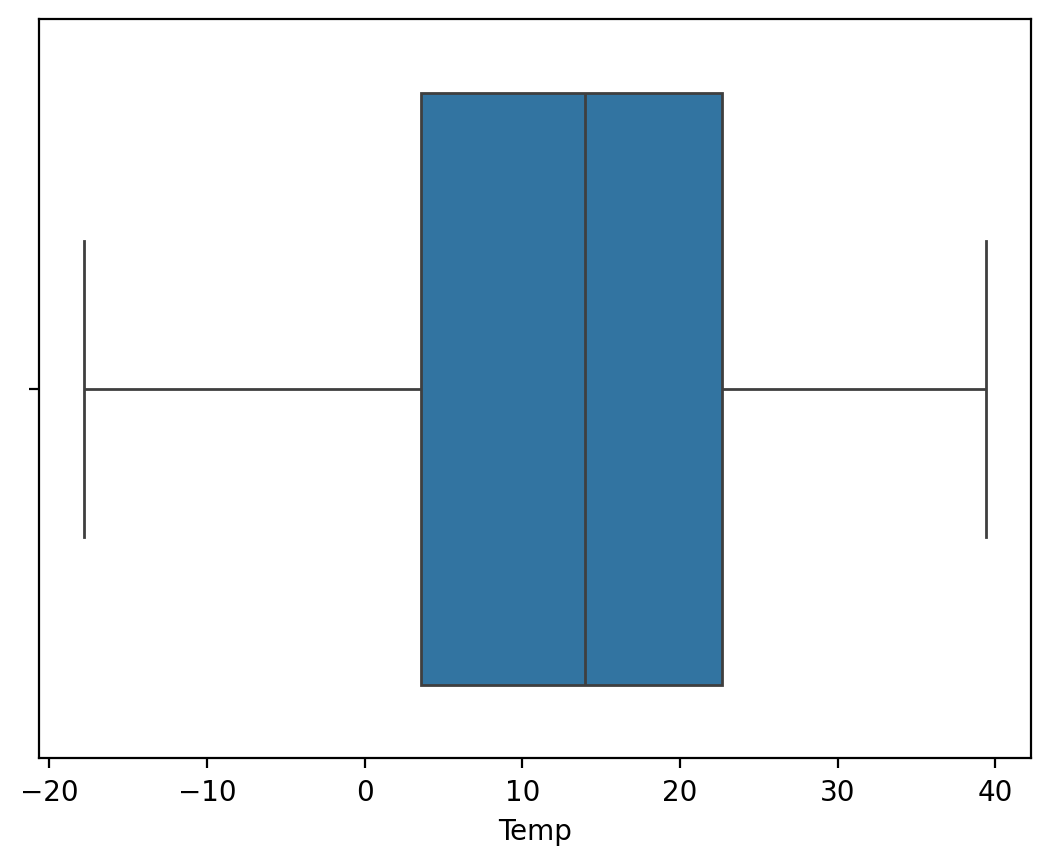

In [161]:
sns.boxplot(x='Temp', data=df3)

In [162]:
df3['Humid'].describe()

count    7008.000000
mean       58.141981
std        20.423404
min         0.000000
25%        42.000000
50%        57.000000
75%        74.000000
max        98.000000
Name: Humid, dtype: float64

습도가 0에 분포한게 보인다. 0이 나올 수 있는건지 궁금하여 찾아보았다.

본 데이터의 습도 변수를 보면 (%)로 측정되어 있다. 이는 상대습도 단위이다.  

  - 상대습도 = $\frac{실제 수증기량}{포화 수증기량}\%$  
    
상대습도가 0%라는 의미는 실제 수증기량이 아예 없다는 의미인데 이는 불가능하다. 왜냐하면 지구의 대기에는 항상 어느 정도의 수증기가 존재한다. 바다, 강, 호수 등의 수역에서 물이 증발하기 때문이다. 따라서 0을 이상치라 취급하고 일 평균을 넣겠다.

In [163]:
df3[df3['Humid']==0]

,Date,Rented Bike Count,Hour,Temp,Humid,WindSpeed,Visibility,DewPTemp,SolarRad,Rainfall,Snowfall,Season,Holiday,Functioning Day,Year,Month,Day
25,2018-05-28,1502,7,16.8,0,0.800000,1387,8.9,0.36,0.0,0.0,Spring,No Holiday,Yes,2018,5,28
273,2018-05-22,248,4,15.6,0,0.500000,1502,10.5,0.00,0.0,0.0,Spring,Holiday,Yes,2018,5,22
638,2018-05-21,467,6,11.4,0,0.900000,2000,-2.0,0.03,0.0,0.0,Spring,No Holiday,Yes,2018,5,21
1052,2018-05-27,174,5,17.6,0,0.800000,1304,9.7,0.00,0.0,0.0,Spring,No Holiday,Yes,2018,5,27
1793,2018-05-22,277,6,15.5,0,0.500000,1691,10.4,0.06,0.0,0.0,Spring,Holiday,Yes,2018,5,22
3465,2018-05-28,134,4,17.2,0,0.400000,1619,8.8,0.00,0.0,0.0,Spring,No Holiday,Yes,2018,5,28
3764,2018-05-22,406,3,NaN,0,0.700000,1420,10.4,0.00,0.0,0.0,Spring,Holiday,Yes,2018,5,22
4296,2018-05-21,200,5,11.9,0,1.300000,2000,-2.7,0.00,0.0,0.0,Spring,No Holiday,Yes,2018,5,21
4504,2018-05-21,113,4,12.4,0,0.800000,2000,-3.4,0.00,0.0,0.0,Spring,No Holiday,Yes,2018,5,21
5000,2018-05-27,341,7,17.6,0,1.771237,1219,8.7,0.34,0.0,0.0,Spring,No Holiday,Yes,2018,5,27


In [164]:
df3[df3['Humid'] == 0]['Date'].value_counts()

Date
2018-05-22    4
2018-05-21    4
2018-05-28    3
2018-05-27    2
Name: count, dtype: int64

0이 있는 날이 5월 22일, 5월 21일, 5월 28일, 5월 27일로 총 4일이고 5월에 몰려있다.

In [165]:
df4 = df3.copy()
# 날짜별 평균 습도를 계산하고, 습도가 0인 값을 대체
df4.loc[(df4['Date'] == '2018-05-21') & (df4['Humid'] == 0), 'Humid'] = round(df4[(df4['Date'] == '2018-05-21') & (df4['Humid'] != 0)]['Humid'].mean(), 0)
df4.loc[(df4['Date'] == '2018-05-22') & (df4['Humid'] == 0), 'Humid'] = round(df4[(df4['Date'] == '2018-05-22') & (df4['Humid'] != 0)]['Humid'].mean(), 0)
df4.loc[(df4['Date'] == '2018-05-27') & (df4['Humid'] == 0), 'Humid'] = round(df4[(df4['Date'] == '2018-05-27') & (df4['Humid'] != 0)]['Humid'].mean(), 0)
df4.loc[(df4['Date'] == '2018-05-28') & (df4['Humid'] == 0), 'Humid'] = round(df4[(df4['Date'] == '2018-05-28') & (df4['Humid'] != 0)]['Humid'].mean(), 0)
df4[df4['Humid']==0]

,Date,Rented Bike Count,Hour,Temp,Humid,WindSpeed,Visibility,DewPTemp,SolarRad,Rainfall,Snowfall,Season,Holiday,Functioning Day,Year,Month,Day


In [166]:
df5 = df4.copy()
df5['Temp'] = np.where(
    df5['Temp'].isna(),
    df5['DewPTemp'] + (100 - df5['Humid']) / 5,
    df5['Temp']
)
df5['Temp'].isna().sum()

0

## 이상치 탐색하기

### Function Day 변수 정리
- Functioning Day=='No'는 작동을 안하는 날이라서 대여량이 측정되지 않음.
- 따라서 No인 데이터를 지워도 분석에 큰 영향이 없을 것으로 판단.

In [167]:
df5['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [168]:
df5[df5['Functioning Day']=='No']

,Date,Rented Bike Count,Hour,Temp,Humid,WindSpeed,Visibility,DewPTemp,SolarRad,Rainfall,Snowfall,Season,Holiday,Functioning Day,Year,Month,Day
16,2018-10-02,0,8,11.2,69,0.9000,1714,5.7,0.49,0.0,0.0,Autumn,No Holiday,No,2018,10,2
30,2018-11-09,0,23,10.9,76,1.2000,456,6.8,0.00,0.0,0.0,Autumn,No Holiday,No,2018,11,9
168,2018-09-28,0,7,14.5,62,1.5000,2000,7.2,0.03,0.0,0.0,Autumn,No Holiday,No,2018,9,28
170,2018-11-06,0,14,17.4,50,1.4582,336,6.8,1.52,0.0,0.0,Autumn,No Holiday,No,2018,11,6
229,2018-11-09,0,13,14.0,46,5.3000,927,2.5,1.68,0.0,0.0,Autumn,No Holiday,No,2018,11,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6871,2018-10-06,0,2,16.9,88,2.5000,2000,14.8,0.00,1.5,0.0,Autumn,No Holiday,No,2018,10,6
6883,2018-09-19,0,23,20.4,57,0.9000,2000,11.5,0.00,0.0,0.0,Autumn,No Holiday,No,2018,9,19
6927,2018-09-18,0,10,22.7,54,1.0000,1619,12.9,1.74,0.0,0.0,Autumn,No Holiday,No,2018,9,18
6931,2018-09-28,0,4,15.0,62,1.5000,2000,7.4,0.00,0.0,0.0,Autumn,No Holiday,No,2018,9,28


총 236개의 No가 있음

In [169]:
df5.loc[df5['Functioning Day'] == 'No', 'Month'].unique()

array([10, 11,  9,  5,  4])

In [170]:
df5.loc[df5['Functioning Day'] == 'No', 'Date'].unique()

<DatetimeArray>
['2018-10-02 00:00:00', '2018-11-09 00:00:00', '2018-09-28 00:00:00',
 '2018-11-06 00:00:00', '2018-05-10 00:00:00', '2018-09-19 00:00:00',
 '2018-11-03 00:00:00', '2018-10-09 00:00:00', '2018-10-04 00:00:00',
 '2018-09-30 00:00:00', '2018-09-18 00:00:00', '2018-10-06 00:00:00',
 '2018-04-11 00:00:00']
Length: 13, dtype: datetime64[ns]

봄, 가을 4,5,9,10,11의 총 13일만 작동이 안됨.

In [171]:
# No를 제거한 데이터셋 생성
df6 = df5[df5['Functioning Day']=='Yes'].copy()
df6[df6['Functioning Day']=='No']

,Date,Rented Bike Count,Hour,Temp,Humid,WindSpeed,Visibility,DewPTemp,SolarRad,Rainfall,Snowfall,Season,Holiday,Functioning Day,Year,Month,Day


In [172]:
#작동일('Functioning Day')변수 제거
df6 = df6.drop('Functioning Day', axis=1)
print(df5.shape)
print(df6.shape)

(7008, 17)
(6772, 16)


### Rented Bike Count 이상치 탐색
- 이상치 처리 X
- 겨울을 제외한 봄, 여름, 가을에 주로 퇴근 시간에 발생한 것으로 보아 사람들이 야외활동을 할 수 있는 날씨에 많이들 퇴근용으로 사용했다 생각함.

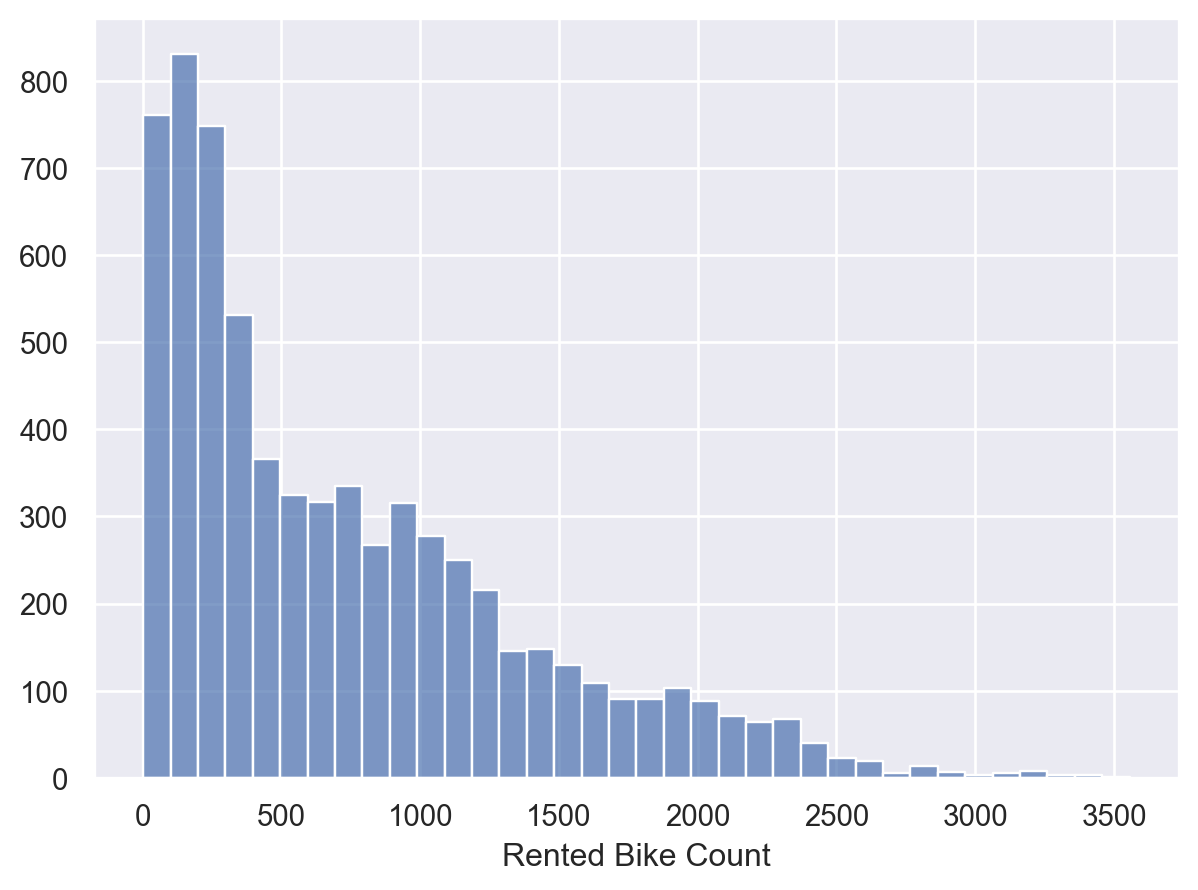

In [173]:
(
    so.Plot(df6, x="Rented Bike Count")
    .add(so.Bars(), so.Hist(binwidth=100))
)

<Axes: ylabel='Rented Bike Count'>

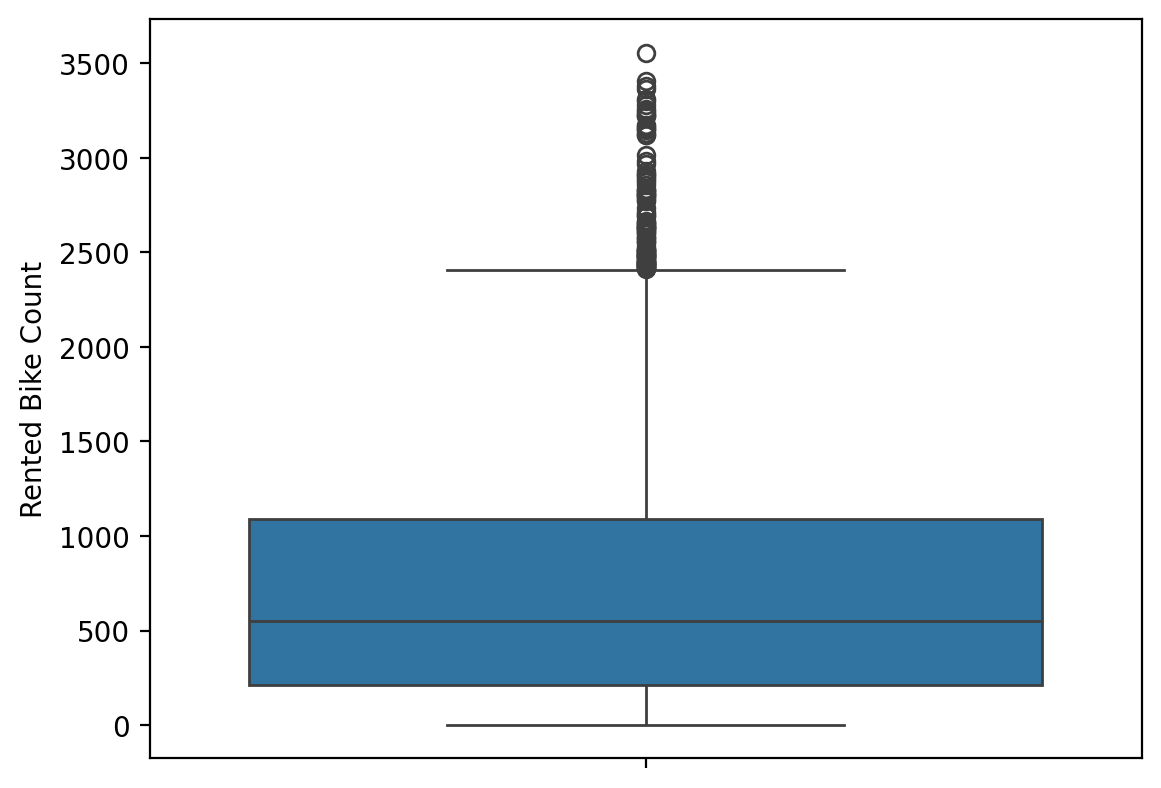

In [174]:
sns.boxplot(df6, y="Rented Bike Count")

In [175]:
Q1 = df6['Rented Bike Count'].quantile(0.25)
Q3 = df6['Rented Bike Count'].quantile(0.75)
IQR = Q3-Q1
upper = Q3 +IQR*1.5
lower = Q1-IQR*1.5
df6[df6['Rented Bike Count'] > upper]
#IQR 기준 이상치는 115개

,Date,Rented Bike Count,Hour,Temp,Humid,WindSpeed,Visibility,DewPTemp,SolarRad,Rainfall,Snowfall,Season,Holiday,Year,Month,Day
13,2018-04-16,2692,18,17.0,28,3.100000,2000,-1.6,0.88,0.0,0.0,Spring,No Holiday,2018,4,16
79,2018-06-16,2497,20,25.0,60,2.400000,1773,16.6,0.10,0.0,0.0,Summer,No Holiday,2018,6,16
128,2018-05-28,3245,18,23.1,39,2.700000,1950,10.9,1.07,0.0,0.0,Spring,No Holiday,2018,5,28
143,2018-06-25,2779,19,29.8,45,1.500000,956,16.5,0.32,0.0,0.0,Summer,No Holiday,2018,6,25
154,2018-06-22,2493,20,25.4,31,2.500000,2000,7.0,0.07,0.0,0.0,Summer,No Holiday,2018,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6668,2018-09-10,2518,19,24.4,47,2.000000,2000,12.3,0.05,0.0,0.0,Autumn,No Holiday,2018,9,10
6672,2018-06-15,2891,18,25.9,44,1.500000,2000,12.7,1.36,0.0,0.0,Summer,No Holiday,2018,6,15
6889,2018-05-25,2916,18,23.3,32,1.751026,1772,5.6,1.05,0.0,0.0,Spring,No Holiday,2018,5,25
6905,2018-09-11,3222,18,24.7,45,0.700000,2000,11.9,0.30,0.0,0.0,Autumn,No Holiday,2018,9,11


In [176]:
df6[df6['Rented Bike Count'] > upper].Holiday.value_counts()

Holiday
No Holiday    115
Name: count, dtype: int64

이상치는 휴일이 아닌 날 발생

In [177]:
df6[df6['Rented Bike Count'] > upper].Hour.value_counts()

Hour
18    62
19    30
20    12
17     4
21     3
8      2
16     2
Name: count, dtype: int64

대부분 18,19,20시에 발생, 이는 퇴근 시간에 발생한 것이 대부분이라 추측

In [178]:
df6[df6['Rented Bike Count'] > upper].Season.value_counts()

Season
Summer    63
Autumn    29
Spring    23
Name: count, dtype: int64

겨울에는 이상치가 발생 안함.  
즉, 날이 괜찮은 날(너무 춥지 않고 야외 활동을 할 수 있음) 퇴근시간에 많은 사람들이 따릉이를 이용했다고 생각할 수 있음. 따라서 이상치라 생각하지 않고 그대로 둘 것임.

### Temp 이상치 탐색
- 이상치가 보이지 않음

<Axes: ylabel='Temp'>

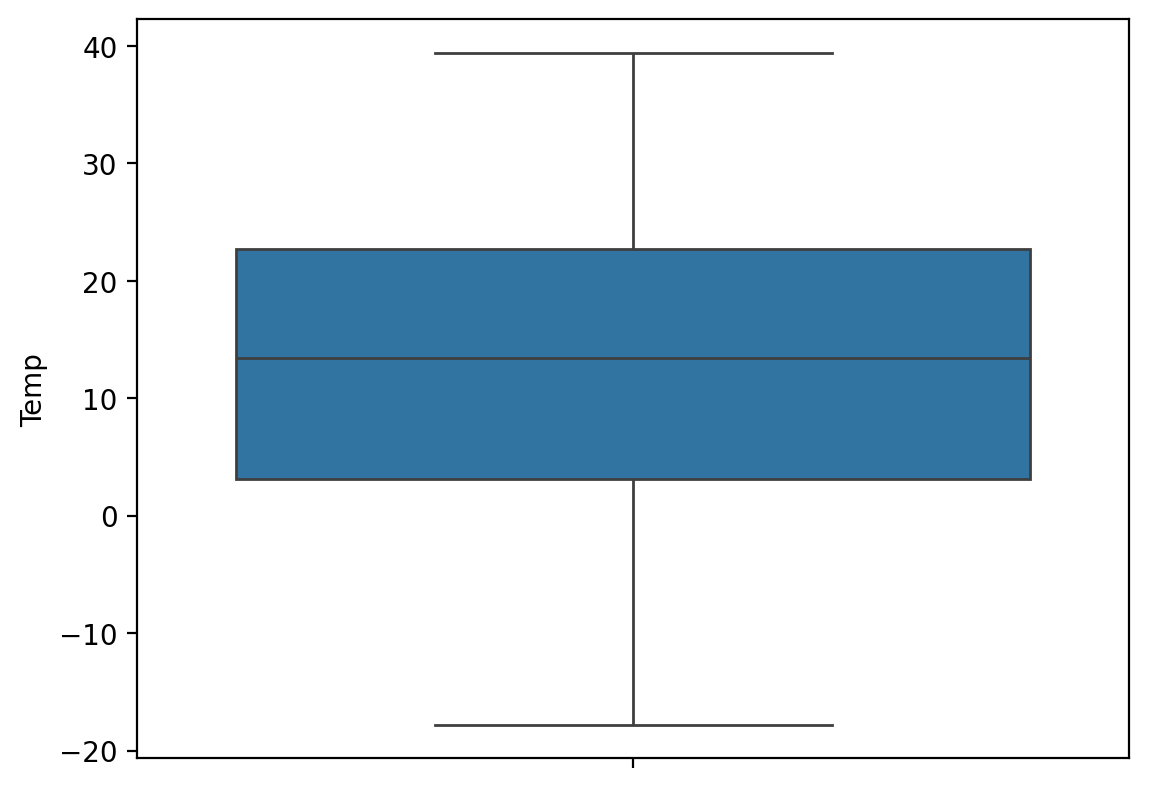

In [179]:
sns.boxplot(df6, y="Temp")

이상치가 따로 보이지 않음.

### Humid 이상치 탐색
- 이상치가 보이지 않음

<Axes: ylabel='Humid'>

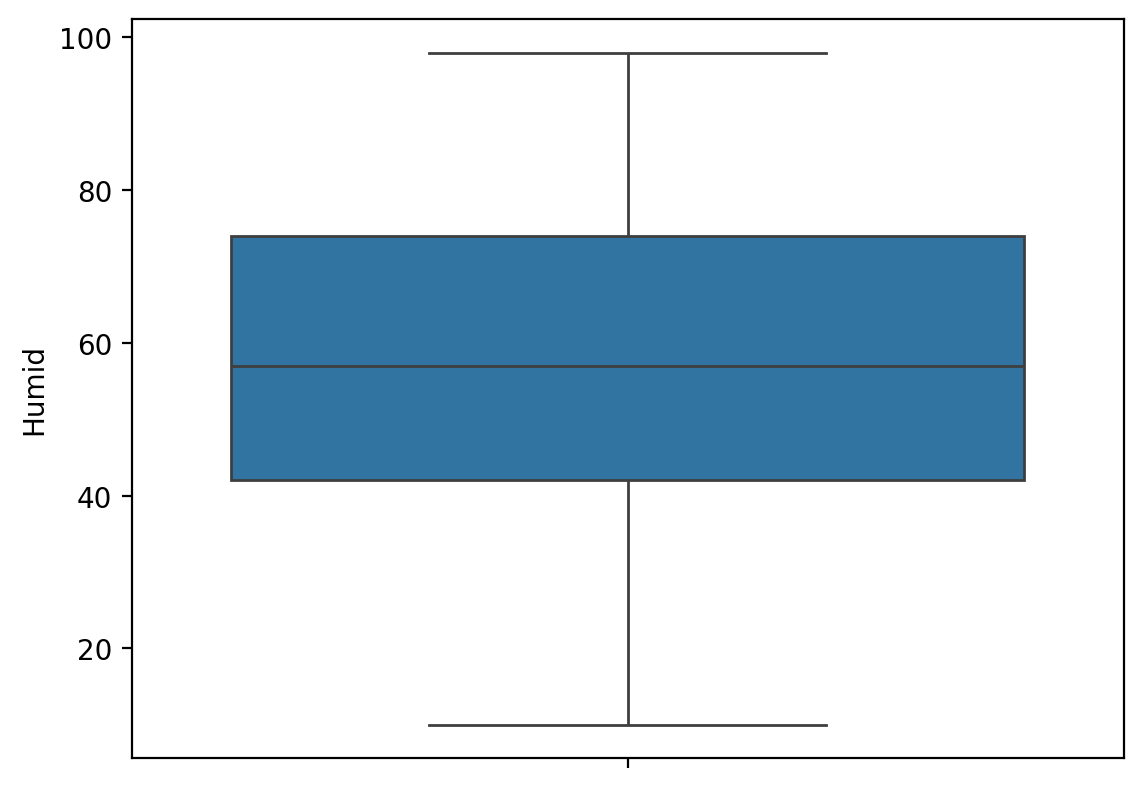

In [180]:
sns.boxplot(df6, y="Humid")

이상치가 따로 보이지 않음.

### WindSpeed 이상치 탐색
- 이상치 처리 X
- 우리나라의 계절에 해당하는 기단에 의한 풍속의 변화라고 간주.

<Axes: ylabel='WindSpeed'>

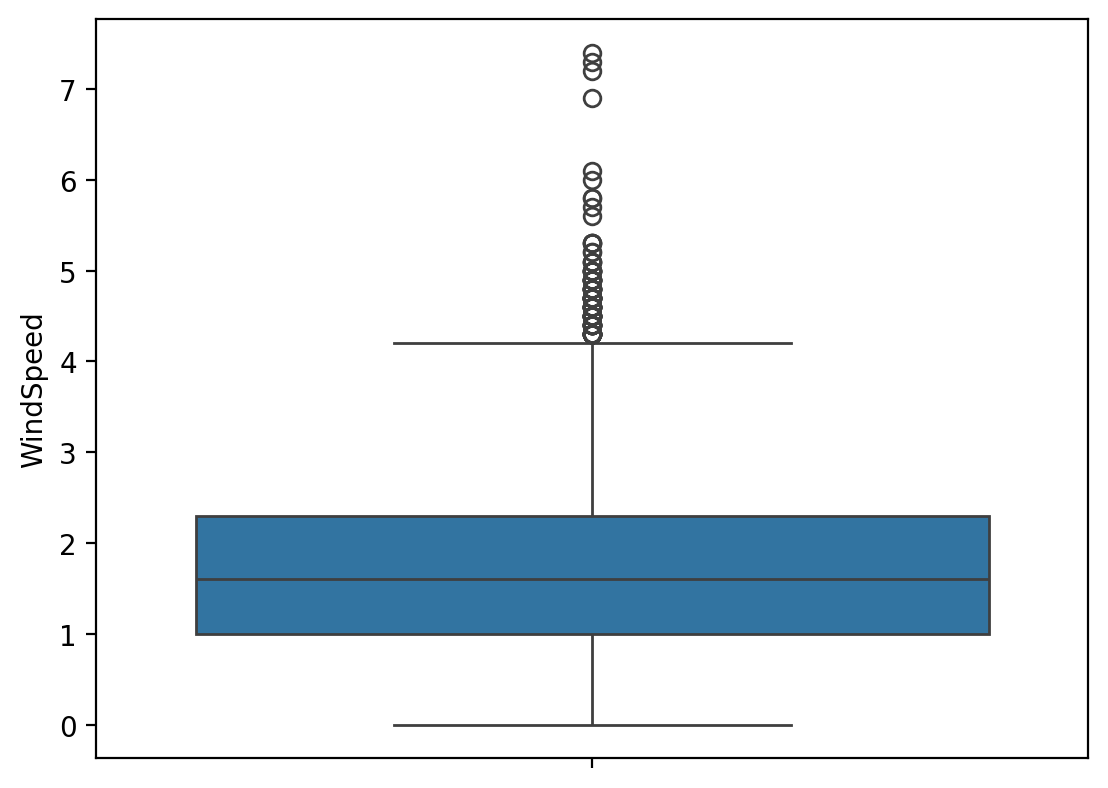

In [181]:
sns.boxplot(df6, y="WindSpeed")

In [182]:
Q1 = df6['WindSpeed'].quantile(0.25)
Q3 = df6['WindSpeed'].quantile(0.75)
IQR = Q3-Q1
upper = Q3 +IQR*1.5
lower = Q1-IQR*1.5
df6[df6['WindSpeed'] > upper]
#IQR 기준 이상치는 124개

,Date,Rented Bike Count,Hour,Temp,Humid,WindSpeed,Visibility,DewPTemp,SolarRad,Rainfall,Snowfall,Season,Holiday,Year,Month,Day
18,2018-04-10,133,21,17.9,70,7.3,1634,11.9,0.00,0.5,0.0,Spring,No Holiday,2018,4,10
98,2017-12-26,271,14,-1.6,20,4.3,2000,-21.6,1.11,0.0,0.0,Winter,No Holiday,2017,12,26
130,2017-12-25,132,1,-1.2,57,4.3,1429,-8.6,0.00,0.0,0.0,Winter,Holiday,2017,12,25
301,2018-03-01,191,10,0.1,53,5.3,1022,-8.3,1.12,0.0,0.0,Spring,Holiday,2018,3,1
340,2018-06-26,552,23,21.6,89,4.3,698,19.7,0.00,0.0,0.0,Summer,No Holiday,2018,6,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6808,2018-03-20,719,17,4.9,43,4.3,2000,-6.6,0.42,0.0,0.0,Spring,No Holiday,2018,3,20
6818,2017-12-10,152,22,-1.0,56,4.7,2000,-8.6,0.00,0.0,0.0,Winter,No Holiday,2017,12,10
6852,2018-05-05,1223,16,23.2,30,4.5,1787,4.6,1.49,0.0,0.0,Spring,No Holiday,2018,5,5
6854,2018-04-06,756,12,7.6,71,4.6,543,1.8,1.05,0.0,0.0,Spring,No Holiday,2018,4,6


In [183]:
df6[df6['WindSpeed'] > upper].groupby('Month')['WindSpeed'].size()

Month
1     21
2     19
3     12
4     22
5      6
6      6
8      2
9      8
10     8
12    20
Name: WindSpeed, dtype: int64

In [184]:
df6[df6['WindSpeed'] > upper].groupby('Season')['WindSpeed'].size()

Season
Autumn    16
Spring    40
Summer     8
Winter    60
Name: WindSpeed, dtype: int64

겨울>봄>가을>여름
겨울과 봄에 많이 풍속이 높은 것으로 확인된다. 이는 겨울에는 우리나라에 시베리아 기단에 의한 한파 및 바람, 봄에 더 발달된 이동성 고기압인 양쯔강기단에 의해 봄에는 더 많은 바람이 부는 것으로 추측할 수 있다.

### Visibility 이상치 탐색
- 이상치가 보이지 않음

<Axes: ylabel='Visibility'>

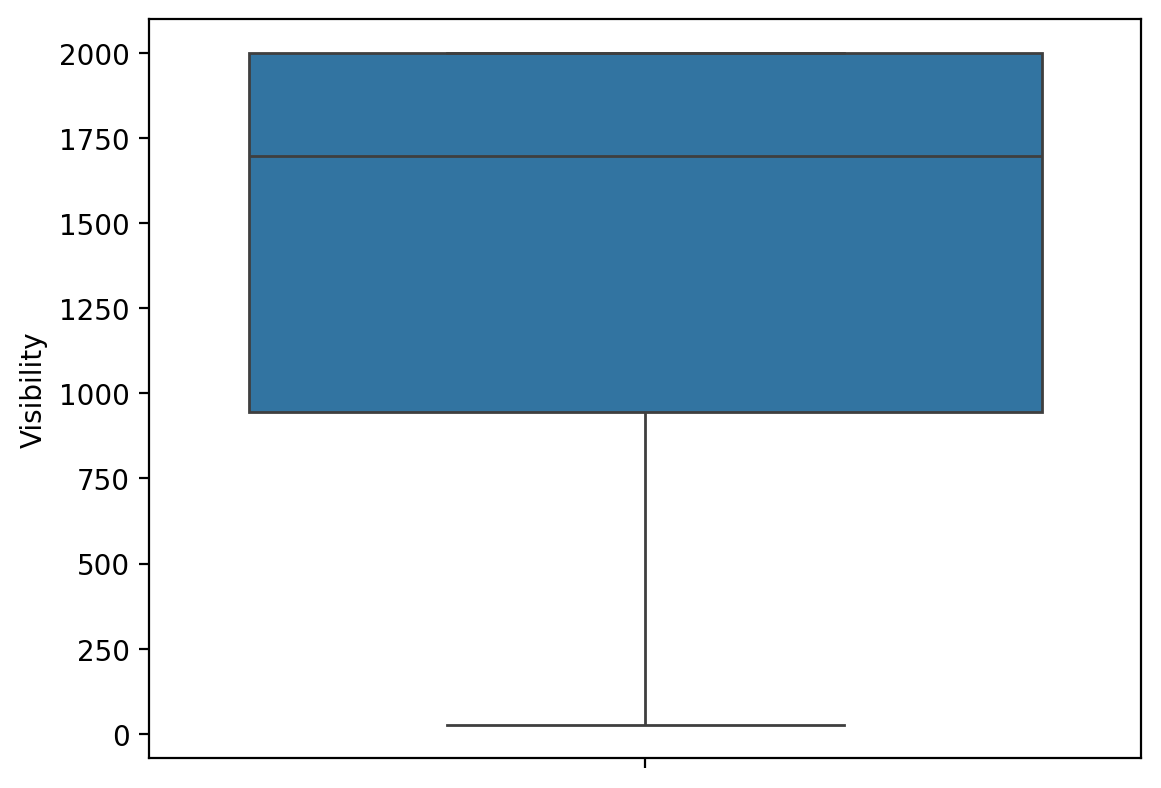

In [185]:
sns.boxplot(df6, y="Visibility")

이상치가 보이지 않음.

### DewPTemp 이상치 탐색
- 이상치가 보이지 않음

<Axes: ylabel='DewPTemp'>

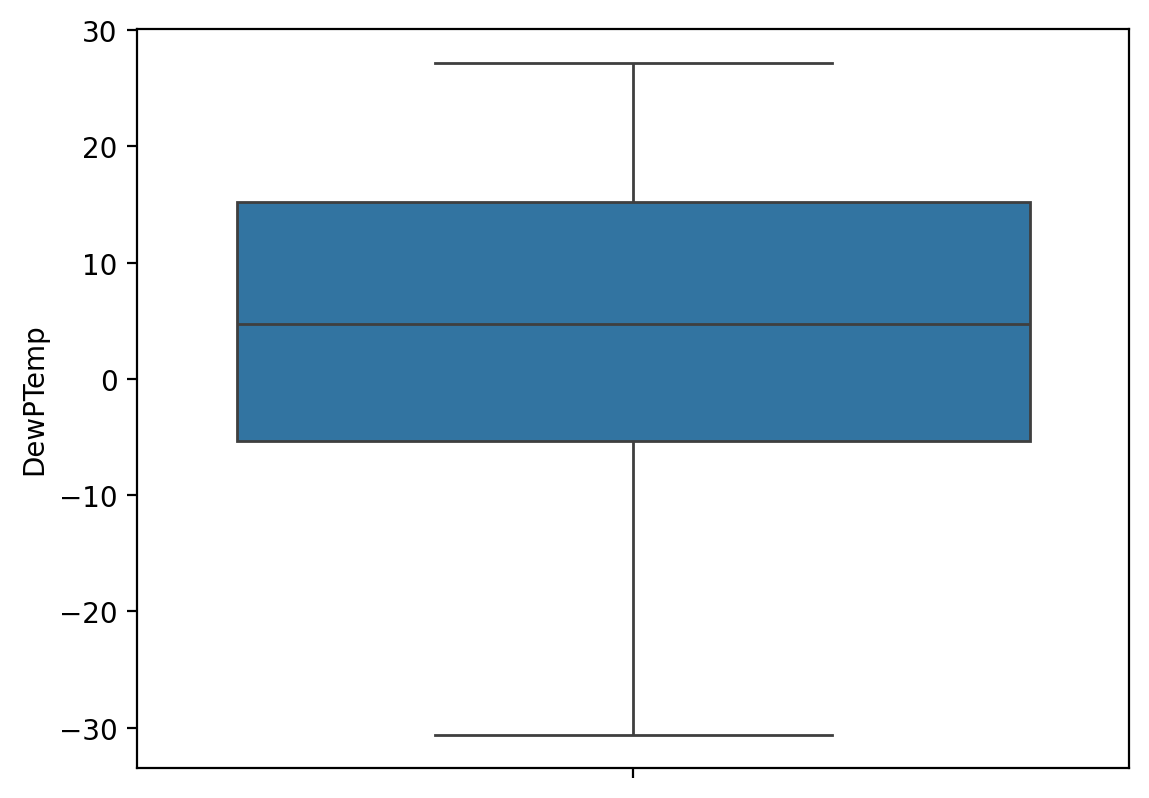

In [186]:
sns.boxplot(df6, y="DewPTemp")

이상치가 따로 보이지 않음.

### SolarRad 이상치 탐색
- 0이 많아서 이상치라 나타난 것임.
- 0을 제외하면 이상치 없음.

<Axes: ylabel='SolarRad'>

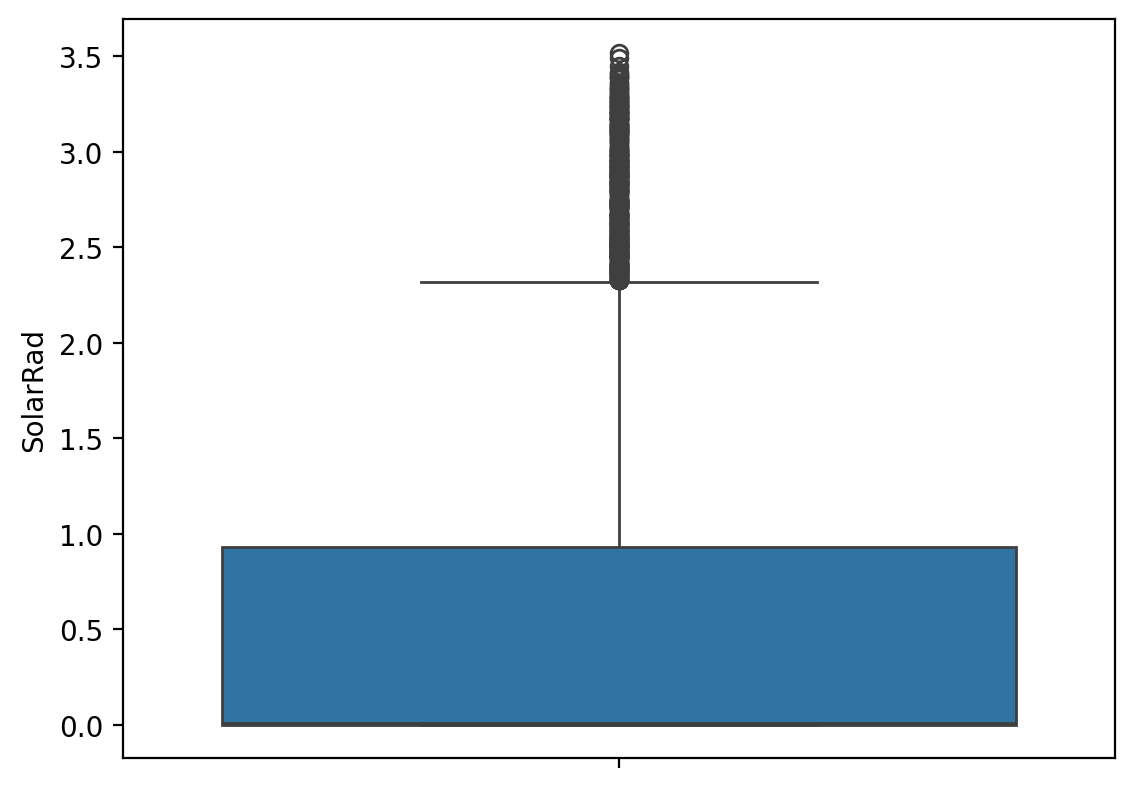

In [187]:
sns.boxplot(df6, y="SolarRad")

In [188]:
Q1 = df6['SolarRad'].quantile(0.25)
Q3 = df6['SolarRad'].quantile(0.75)
IQR = Q3-Q1
upper = Q3 +IQR*1.5
lower = Q1-IQR*1.5
df6[df6['SolarRad'] > upper]
#IQR 기준 이상치는 515개

,Date,Rented Bike Count,Hour,Temp,Humid,WindSpeed,Visibility,DewPTemp,SolarRad,Rainfall,Snowfall,Season,Holiday,Year,Month,Day
6,2018-07-04,941,11,29.3,60,2.300000,1861,21.3,2.61,0.0,0.0,Summer,No Holiday,2018,7,4
22,2018-08-31,987,14,29.3,41,1.900000,1928,14.6,3.00,0.0,0.0,Summer,No Holiday,2018,8,31
35,2018-10-03,1849,13,22.5,40,2.600000,1854,8.2,2.64,0.0,0.0,Autumn,Holiday,2018,10,3
43,2018-06-16,1861,15,27.8,41,1.600000,1851,13.3,2.89,0.0,0.0,Summer,No Holiday,2018,6,16
52,2018-07-16,688,11,31.5,51,1.509517,1498,20.1,2.83,0.0,0.0,Summer,No Holiday,2018,7,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6904,2018-07-27,619,11,32.7,56,1.900000,1034,22.7,2.57,0.0,0.0,Summer,No Holiday,2018,7,27
6922,2018-08-31,868,11,26.7,51,2.700000,1925,15.7,2.65,0.0,0.0,Summer,No Holiday,2018,8,31
6988,2018-06-13,2088,14,26.6,50,2.400000,1119,15.3,2.95,0.0,0.0,Summer,No Holiday,2018,6,13
6989,2018-05-23,1012,11,18.9,42,3.800000,2000,5.6,3.13,0.0,0.0,Spring,No Holiday,2018,5,23


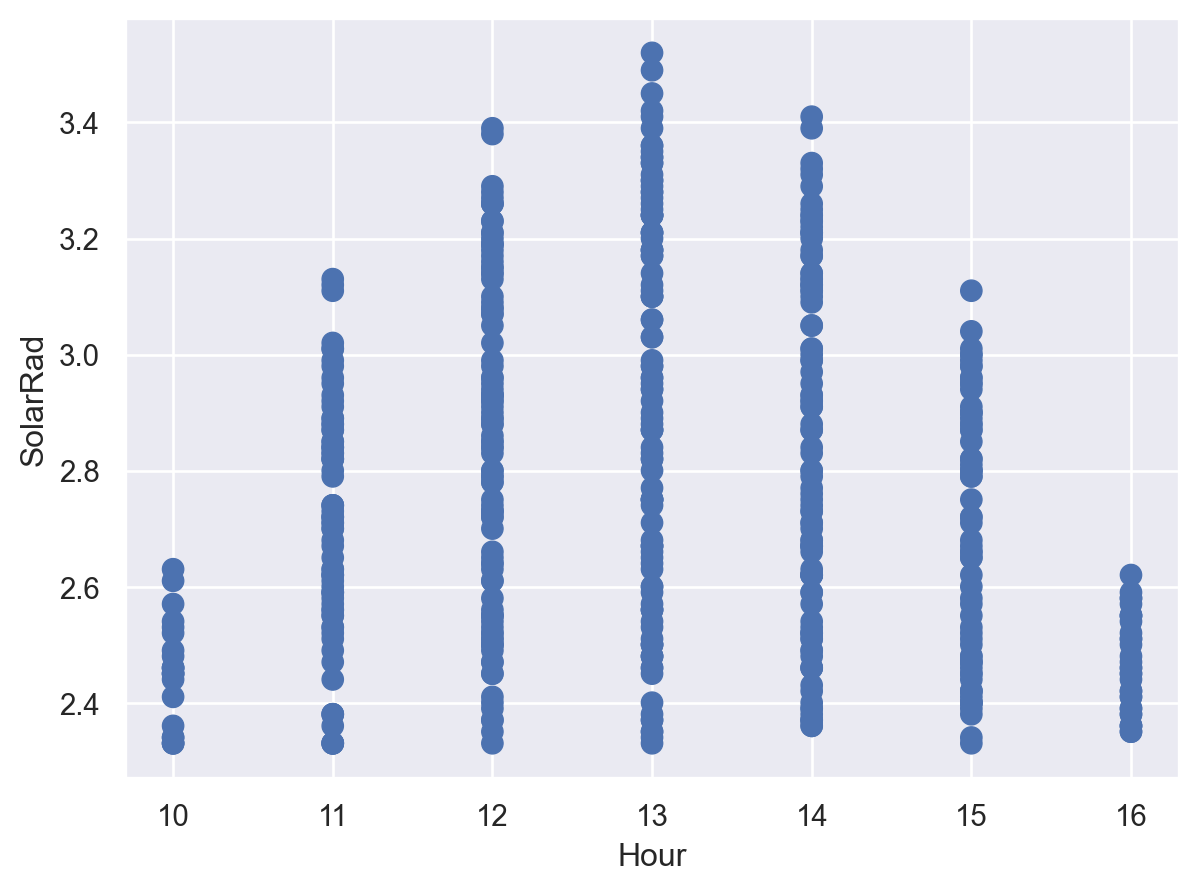

In [189]:
(
    so.Plot(df6[df6['SolarRad'] > upper], x='Hour', y='SolarRad')
    .add(so.Dot(pointsize=8))
)

낮 시간대에 분포되어 있음을 확인함. 따라서 태양복사량이 단지 밤 시간때 0이 많기 때문에 이렇게 이상치라고 보일 수 있었음.

<Axes: ylabel='SolarRad'>

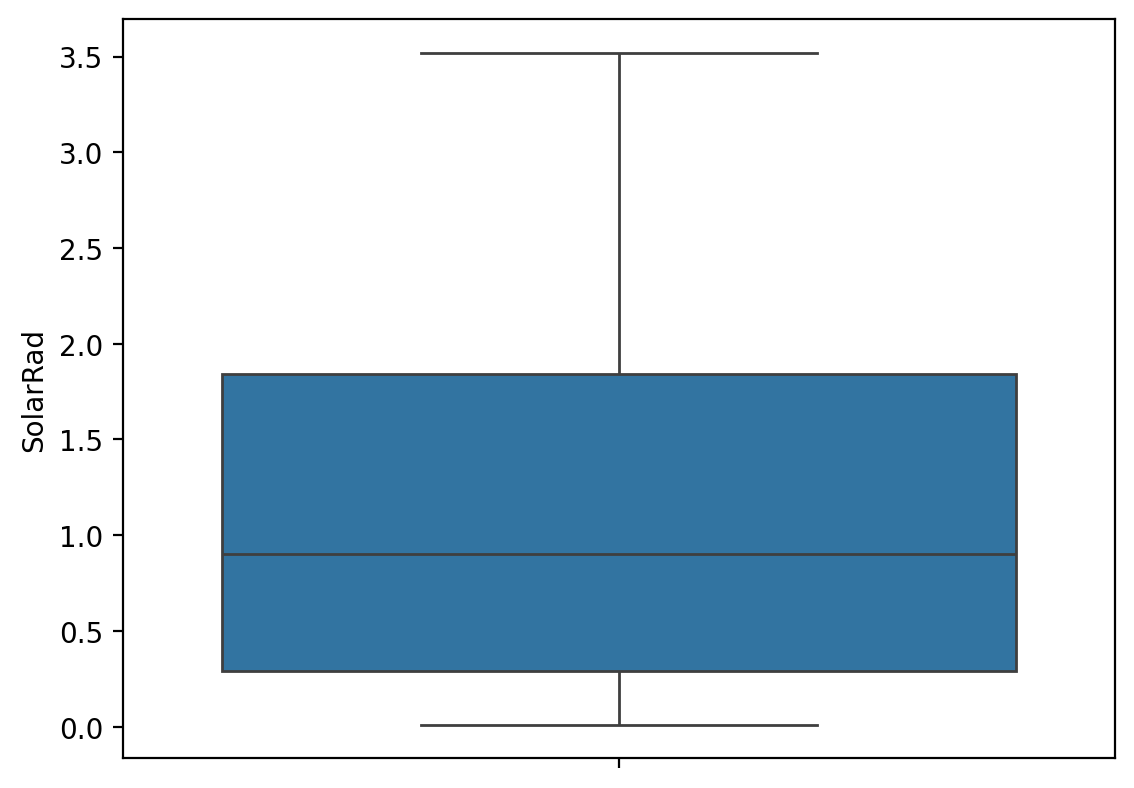

In [190]:
sns.boxplot(df6[df6['SolarRad'] != 0], y="SolarRad")

0을 제거하고 확인하니 이상치가 없음을 확인함.

### Rainfall 이상치 탐색
- 이상치가 보이나 계절적 특성이라 처리 X
- 비가 왔는지의 여부를 확인하는 rain 변수를 추가 (안오면: 0, 오면: 1)

<Axes: ylabel='Rainfall'>

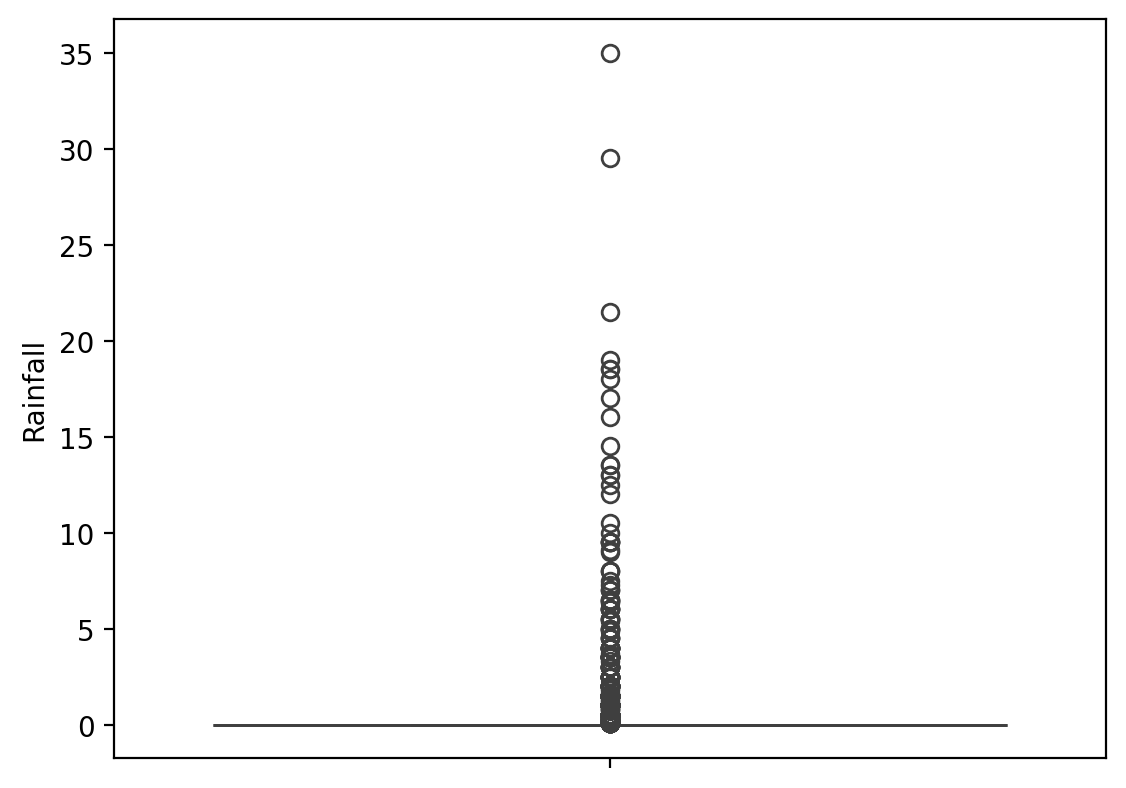

In [191]:
sns.boxplot(df6, y="Rainfall")

0때문임. 
1. 0을 제거하고 박스플랏을 확인하고
2. 0을 기준으로 비의 유무 변수를 만들겠음.

<Axes: ylabel='Rainfall'>

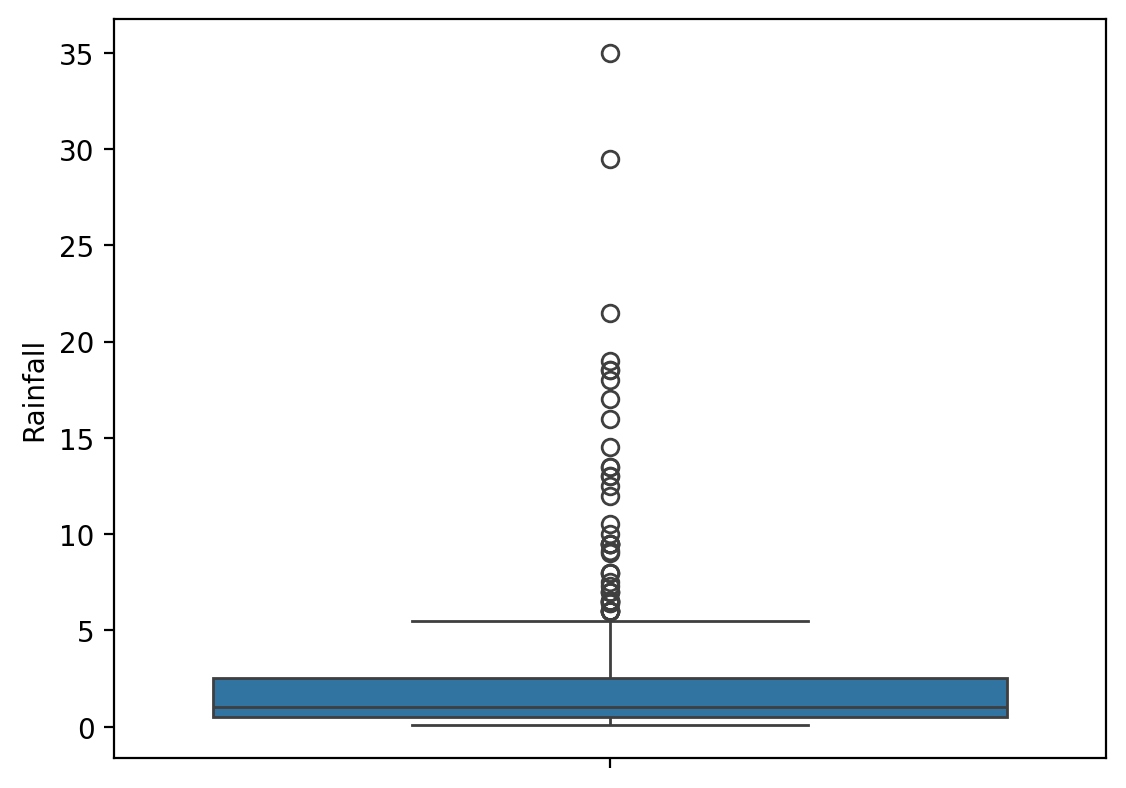

In [192]:
sns.boxplot(df6[df6['Rainfall'] != 0], y="Rainfall")

In [193]:
df6_rain = df6[df6['Rainfall'] != 0]
Q1 = df6_rain['Rainfall'].quantile(0.25)
Q3 = df6_rain['Rainfall'].quantile(0.75)
IQR = Q3-Q1
upper = Q3 +IQR*1.5
lower = Q1-IQR*1.5
df6_rain[df6_rain['Rainfall'] > upper]
#IQR 기준 이상치는 45개

,Date,Rented Bike Count,Hour,Temp,Humid,WindSpeed,Visibility,DewPTemp,SolarRad,Rainfall,Snowfall,Season,Holiday,Year,Month,Day
64,2018-07-01,11,11,21.2,97,1.200000,105,20.6,0.15,18.5,0.0,Summer,No Holiday,2018,7,1
216,2018-02-28,10,21,2.4,95,2.500000,1349,1.6,0.00,9.0,0.0,Winter,No Holiday,2018,2,28
261,2018-07-28,468,15,28.9,86,2.200000,1592,26.3,0.26,7.3,0.0,Summer,No Holiday,2018,7,28
433,2018-07-01,9,12,21.1,97,1.200000,653,20.5,0.17,7.5,0.0,Summer,No Holiday,2018,7,1
723,2018-07-02,153,11,21.7,97,1.459773,591,21.1,0.25,8.0,0.0,Summer,No Holiday,2018,7,2
1167,2018-10-06,2,10,17.0,97,1.500000,676,16.5,0.15,6.0,0.0,Autumn,No Holiday,2018,10,6
1261,2018-09-03,113,18,21.9,97,1.800000,757,21.3,0.02,13.0,0.0,Autumn,No Holiday,2018,9,3
1291,2018-11-08,21,21,14.1,96,4.100000,292,13.3,0.00,18.0,0.0,Autumn,No Holiday,2018,11,8
1419,2018-08-29,24,19,23.5,97,0.300000,323,22.9,0.00,6.5,0.0,Summer,No Holiday,2018,8,29
1465,2018-03-15,32,9,14.1,98,1.843974,253,13.7,0.06,17.0,0.0,Spring,No Holiday,2018,3,15


In [194]:
df6_rain[df6_rain['Rainfall'] > upper].groupby('Season')['Rainfall'].size()

Season
Autumn     9
Spring    12
Summer    20
Winter     4
Name: Rainfall, dtype: int64

In [195]:
df6_rain[df6_rain['Rainfall'] > upper].groupby('Season')['Rainfall'].mean()

Season
Autumn     9.677778
Spring    12.416667
Summer    11.760000
Winter     8.600000
Name: Rainfall, dtype: float64

계절적 특징을 반영했다고 생각할 수 있다. 따라서 이상치 처리 안함.

In [196]:
# 비의 유무 변수 만들기
df6['Rain'] = df6.Rainfall.apply(lambda x: 0 if x == 0 else 1)

### Snowfall 이상치 탐색
- 이상치가 보이나 계절적 특성이라 처리 X
- 눈이 왔는지의 여부를 확인하는 snow 변수를 추가 (안오면: 0, 오면: 1)

<Axes: ylabel='Snowfall'>

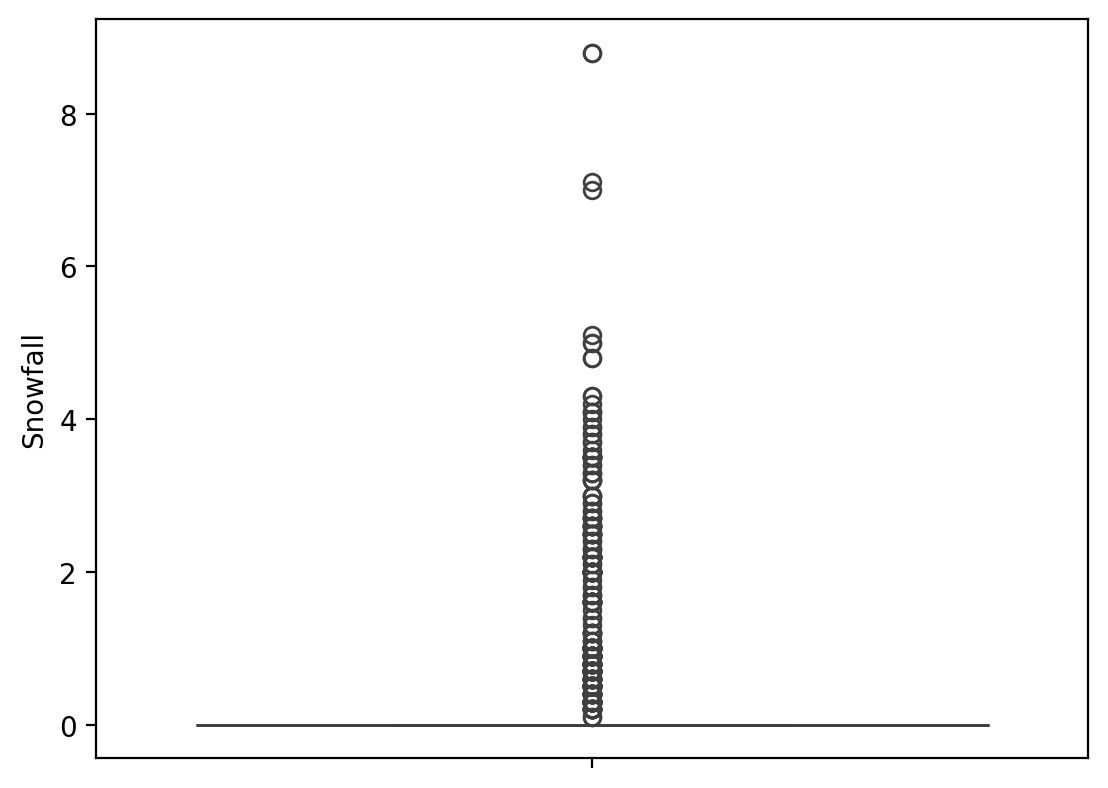

In [197]:
sns.boxplot(df6, y="Snowfall")

<Axes: ylabel='Snowfall'>

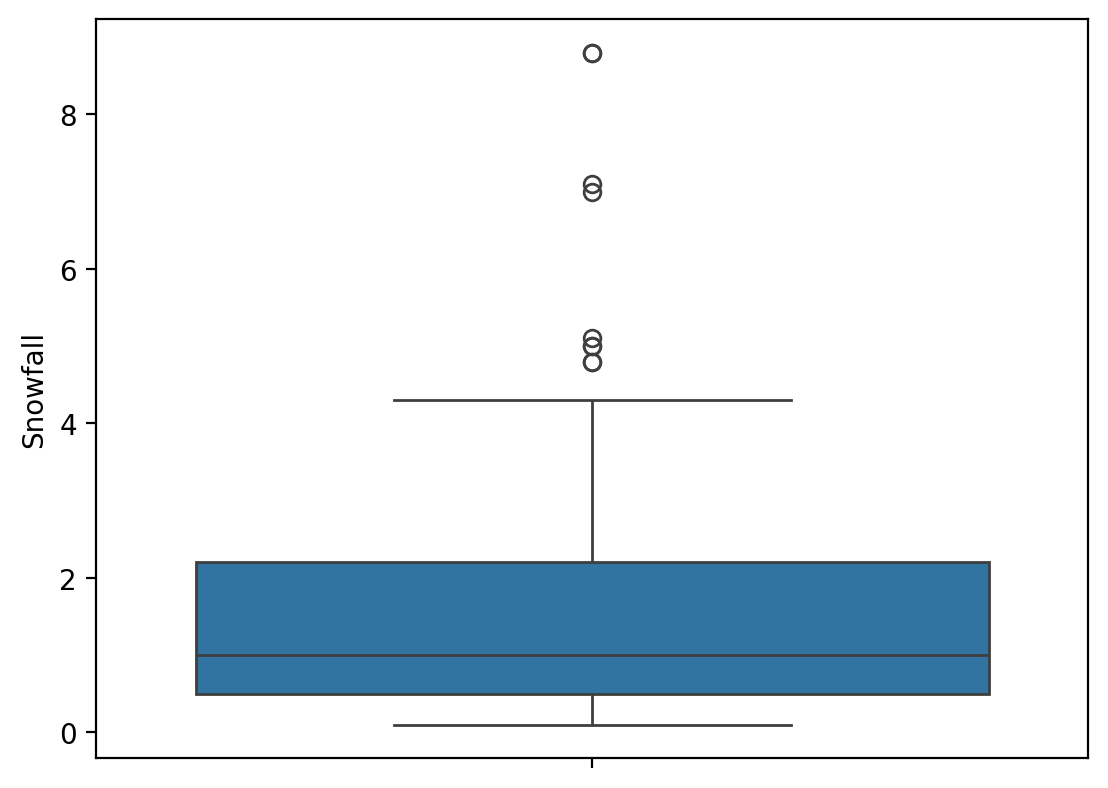

In [198]:
sns.boxplot(df6[df6['Snowfall'] != 0], y="Snowfall")

In [199]:
df6_snow = df6[df6['Snowfall'] != 0]
Q1 = df6_snow['Snowfall'].quantile(0.25)
Q3 = df6_snow['Snowfall'].quantile(0.75)
IQR = Q3-Q1
upper = Q3 +IQR*1.5
lower = Q1-IQR*1.5
df6_snow[df6_snow['Snowfall'] > upper]
#IQR 기준 이상치는 9개

,Date,Rented Bike Count,Hour,Temp,Humid,WindSpeed,Visibility,DewPTemp,SolarRad,Rainfall,Snowfall,Season,Holiday,Year,Month,Day,Rain
133,2018-11-24,298,14,3.0,82,1.700000,1589,0.2,0.55,0.0,5.0,Autumn,No Holiday,2018,11,24,0
536,2017-12-18,36,10,-3.7,87,1.000000,541,-5.5,0.03,0.0,4.8,Winter,No Holiday,2017,12,18,0
2170,2018-11-24,114,11,1.2,97,2.300000,975,0.7,0.07,0.0,8.8,Autumn,No Holiday,2018,11,24,0
3250,2018-11-24,62,10,0.4,97,1.459457,207,0.0,0.00,0.0,8.8,Autumn,No Holiday,2018,11,24,0
3326,2017-12-18,44,11,-2.0,85,1.751781,243,-5.0,0.06,0.0,4.8,Winter,No Holiday,2017,12,18,0
3814,2017-12-18,62,12,-0.9,83,1.200000,351,-4.3,0.09,1.1,5.1,Winter,No Holiday,2017,12,18,1
4135,2018-11-24,24,9,0.3,97,3.000000,34,-0.1,0.00,9.1,7.1,Autumn,No Holiday,2018,11,24,1
4309,2018-11-24,167,12,2.5,84,1.459344,1538,0.0,0.40,1.8,7.0,Autumn,No Holiday,2018,11,24,1
5385,2017-12-18,76,13,-0.9,84,1.200000,333,-3.2,0.09,0.0,5.0,Winter,No Holiday,2017,12,18,0


In [200]:
df6_snow[df6_snow['Snowfall'] > upper].groupby('Season')['Snowfall'].size()

Season
Autumn    5
Winter    4
Name: Snowfall, dtype: int64

가을, 겨울에만 보이는 것으로 계절적 특성이라 반영.

In [201]:
# 눈의 유무 변수 만들기
df6['Snow'] = df6.Snowfall.apply(lambda x: 0 if x == 0 else 1)

# 2차 전처리
과정  
1. 범주형 데이터 수치화
2. 변수 선택
3. feature engineering
4. train, valid, test set 분리
5. 변수 스케일링

## 범주형 데이터 수치화
- 명목형 변수: Season, Holiday, Rain, Snow

In [202]:
ohe = OneHotEncoder(sparse_output=False) #sparse_output=False: 희소행렬로 반환 X

result_ohe = ohe.fit_transform(df6[["Season","Holiday"]]).astype(int)
result_ohe

array([[1, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1]])

Rain, Snow는 이미 1, 0으로 변환하였기에 원핫인코딩 작업이 필요없음

In [203]:
#각 변수들의 카테고리가 학습된 것을 확인
ohe.categories_

[array(['Autumn', 'Spring', 'Summer', 'Winter'], dtype=object),
 array(['Holiday', 'No Holiday'], dtype=object)]

In [204]:
#result_ohe는 numpy.array이므로 데이터프레임으로 변환
df_ohe = pd.DataFrame(result_ohe, columns=ohe.get_feature_names_out(["Season","Holiday"]))
df_ohe

,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Holiday_Holiday,Holiday_No Holiday
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,1,0,0,0,0,1
3,0,0,1,0,0,1
4,0,0,1,0,0,1
...,...,...,...,...,...,...
6767,0,0,0,1,0,1
6768,0,1,0,0,0,1
6769,0,1,0,0,0,1
6770,0,1,0,0,0,1


범주를 모두 원핫 인코딩을 하면 해당 열간에 완벽한 선형 관계가 생겨 다중공선성이 발생할 수 있음. 따라서 다중공선성을 방지하기 위해 각 1개씩 열을 제거함.

In [205]:
df_ohe = df_ohe.drop(columns=["Season_Winter", 'Holiday_No Holiday'])
df_ohe

,Season_Autumn,Season_Spring,Season_Summer,Holiday_Holiday
0,1,0,0,0
1,0,1,0,1
2,1,0,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
6767,0,0,0,0
6768,0,1,0,0
6769,0,1,0,0
6770,0,1,0,0


In [206]:
df_v1 = pd.concat([df_ohe, df6.reset_index(drop=True)], axis=1)
df_v1

,Season_Autumn,Season_Spring,Season_Summer,Holiday_Holiday,Date,Rented Bike Count,Hour,Temp,Humid,WindSpeed,...,SolarRad,Rainfall,Snowfall,Season,Holiday,Year,Month,Day,Rain,Snow
0,1,0,0,0,2018-10-24,1492,16,16.6,42,1.3,...,1.22,0.0,0.0,Autumn,No Holiday,2018,10,24,0,0
1,0,1,0,1,2018-05-01,1536,14,23.0,64,2.8,...,1.59,0.0,0.0,Spring,Holiday,2018,5,1,0,0
2,1,0,0,0,2018-11-14,327,2,6.2,59,0.6,...,0.00,0.0,0.0,Autumn,No Holiday,2018,11,14,0,0
3,0,0,1,0,2018-08-31,170,4,23.2,83,1.6,...,0.00,0.0,0.0,Summer,No Holiday,2018,8,31,0,0
4,0,0,1,0,2018-06-26,45,5,23.7,64,0.9,...,0.00,0.1,0.0,Summer,No Holiday,2018,6,26,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6767,0,0,0,0,2018-02-08,255,7,-9.6,67,1.0,...,0.00,0.0,0.0,Winter,No Holiday,2018,2,8,0,0
6768,0,1,0,0,2018-03-28,104,4,10.6,77,0.9,...,0.00,0.0,0.0,Spring,No Holiday,2018,3,28,0,0
6769,0,1,0,0,2018-04-30,569,0,14.7,54,1.3,...,0.00,0.0,0.0,Spring,No Holiday,2018,4,30,0,0
6770,0,1,0,0,2018-05-29,2234,8,20.5,66,1.7,...,0.34,0.0,0.0,Spring,No Holiday,2018,5,29,0,0


## 변수선택
- Season_Autumn
- Season_Spring
- Season_Summer
- Holiday_Holiday
- Date
- Rented Bike Count
- Hour
- Temp
- Humid
- WindSpeed
- Visibility
- DewPTemp
- SolarRad
- Rainfall
- Snowfall
- Season
- ~ Holiday
- ~ Year
- ~ Month
- ~ Day
- Rain
- Snow

In [207]:
df_v1.columns

Index(['Season_Autumn', 'Season_Spring', 'Season_Summer', 'Holiday_Holiday',
       'Date', 'Rented Bike Count', 'Hour', 'Temp', 'Humid', 'WindSpeed',
       'Visibility', 'DewPTemp', 'SolarRad', 'Rainfall', 'Snowfall', 'Season',
       'Holiday', 'Year', 'Month', 'Day', 'Rain', 'Snow'],
      dtype='object')

In [208]:
#필요없는 열은 제거
df_final = df_v1.drop(["Holiday","Year","Month","Day", "Season"], axis=1)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6772 entries, 0 to 6771
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Season_Autumn      6772 non-null   int32         
 1   Season_Spring      6772 non-null   int32         
 2   Season_Summer      6772 non-null   int32         
 3   Holiday_Holiday    6772 non-null   int32         
 4   Date               6772 non-null   datetime64[ns]
 5   Rented Bike Count  6772 non-null   int64         
 6   Hour               6772 non-null   int64         
 7   Temp               6772 non-null   float64       
 8   Humid              6772 non-null   int64         
 9   WindSpeed          6772 non-null   float64       
 10  Visibility         6772 non-null   int64         
 11  DewPTemp           6772 non-null   float64       
 12  SolarRad           6772 non-null   float64       
 13  Rainfall           6772 non-null   float64       
 14  Snowfall

## train, valid, test 셋 분리

In [209]:
# 각 클래스의 샘플 수 확인
y.value_counts()[y.value_counts() == 1]

Rented Bike Count
1472    1
2329    1
1821    1
1818    1
2468    1
       ..
2377    1
1424    1
2194    1
3146    1
2234    1
Name: count, Length: 645, dtype: int64

In [210]:
#X(독립변수), y(종속변수) 분리
X = df_final1.drop("Rented Bike Count", axis=1)
y = df_final1["Rented Bike Count"]

y의 클래스가 너무 적은 경우 stratify=y 작업을 수행할 수 없다. 따라서 각 클래스의 샘플 수를 확인하고 샘플 수가 적은 클래스의 데이터를 복제하거나, 오버샘플링 기법을 사용하여 데이터를 증가시키도록 하여 진행하겠다.

In [211]:
df_final1.dtypes

Season_Autumn          int32
Season_Spring          int32
Season_Summer          int32
Holiday_Holiday        int32
Date                   int64
Rented Bike Count      int64
Hour                   int64
Temp                 float64
Humid                  int64
WindSpeed            float64
Visibility             int64
DewPTemp             float64
SolarRad             float64
Rainfall             float64
Snowfall             float64
Rain                   int64
Snow                   int64
dtype: object

데이터프레임에서 서로 호환되지 않는 데이터 타입(datetime64, float64)을 함께 처리하려고 할 때 에러가 발생할 수 있음. 따라서 날짜 데이터를 숫자형으로 변환.

In [212]:
# RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

In [213]:
# 오버샘플링 전 크기 확인
print(X.shape, y.shape)

ros = RandomOverSampler(random_state=100)
X_resampled, y_resampled = ros.fit_resample(X, y)

# 오버샘플링 후 크기 확인
print(X_resampled.shape, y_resampled.shape)

# 크기가 일치하는지 확인한 후 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, train_size=0.8, test_size=0.2, stratify=y_resampled, random_state=100)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(6772, 16) (6772,)
(34629, 16) (34629,)
(27703, 16) (6926, 16) (27703,) (6926,)


## 변수 스케일링

### Standard Scaler

In [214]:
#객체 생성
ss = StandardScaler()

#학습 및 변환
X_train_ss = ss.fit_transform(X_train)
X_val_ss = ss.transform(X_val)
#X_test_ss = ss.transform(X_test) #test셋이 있는 경우

print("<train 셋>")
print(f'평균: {X_train_ss.mean()}\n분산: {X_train_ss.std()}')
print("<valid 셋>")
print(f'평균: {X_val_ss.mean()}\n분산: {X_val_ss.std()}')

<train 셋>
평균: -3.5075240790254827e-16
분산: 0.9999999999999999
<valid 셋>
평균: 0.000771112080589403
분산: 1.0011455845967874


### MinMax Scaler

In [215]:
#객체 생성
mms = MinMaxScaler()

#학습 및 변환
X_train_mms = mms.fit_transform(X_train)
X_val_mms = mms.transform(X_val)
#X_test_mms = mms.transform(X_test) #test셋이 있는 경우

print("<train 셋>")
print(f'최대: {X_train_mms.max()}\n최소: {X_train_mms.min()}')
print("<valid 셋>")
print(f'최대: {X_val_mms.max()}\n최소: {X_val_mms.min()}')

<train 셋>
최대: 1.0000000000000002
최소: 0.0
<valid 셋>
최대: 1.0
최소: 0.0


### MaxAbs Scaler

In [216]:
#객체 생성
mas = MaxAbsScaler()

#학습 및 변환
X_train_mas = mas.fit_transform(X_train)
X_val_mas = mas.transform(X_val)
#X_test_mas = mas.transform(X_test) #test셋이 있는 경우

print("<train 셋>")
print(f'최대: {X_train_mas.max()}\n최소: {X_train_mas.min()}')
print("<valid 셋>")
print(f'최대: {X_val_mas.max()}\n최소: {X_val_mas.min()}')

<train 셋>
최대: 1.0
최소: -1.0
<valid 셋>
최대: 1.0
최소: -1.0


### Robust Scaler

In [217]:
#객체 생성
rs = RobustScaler()

#학습 및 변환
X_train_rs = rs.fit_transform(X_train)
X_val_rs = rs.transform(X_val)
#X_test_rs = rs.transform(X_test) #test셋이 있는 경우

print("<train 셋>")
print(f'평균: {X_train_rs.mean()}\n분산: {X_train_rs.std()}')
print("<valid 셋>")
print(f'평균: {X_val_rs.mean()}\n분산: {X_val_rs.std()}')

<train 셋>
평균: 0.058250433501836764
분산: 0.5985832617641061
<valid 셋>
평균: 0.058466182410061594
분산: 0.5929040829002873
